In [27]:
# the purpose of this program is to parse through all the 
import math
import numpy as np
import pandas as pd
import random
import os
import json
import pprint
import tensorflow as tf
import re 
from pandas.io.json import json_normalize
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sn

from math import log
from math import sqrt
# Visualize training history

import matplotlib.pyplot as plt
import numpy
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

import statistics
from sklearn.preprocessing import MinMaxScaler

In [28]:
#%%timeit
initial_path = "/data/data"
root_dir = os.listdir(initial_path)
list_of_json = []
counter_total = 0;
for dir in root_dir:
    curr_path = initial_path + "/" + dir + "/enrichment/cert_info"
    #print(curr_dir)
    if os.path.exists(curr_path):
        curr_dir = os.listdir(curr_path)
        for sub_json in curr_dir:
        #do i need the last /
            each_json = curr_path + "/" + sub_json
            print(each_json)
            ran =random.random()
            if(ran<.30):
                counter_total = counter_total+1
                #print('counter_total'+ str(counter_total))
                list_of_json.append(each_json)
    else:
        pass    
print('counter_total'+ str(counter_total))

/data/data/2019-02-23/enrichment/cert_info/5c71d8a0d276305f899a9b1d.json
/data/data/2019-02-23/enrichment/cert_info/5c71dd6a371f594929046d8f.json
/data/data/2019-02-23/enrichment/cert_info/5c71dd6b2d99fb66ca2575fa.json
/data/data/2019-02-23/enrichment/cert_info/5c71dd6c2d99fb66ca2575fb.json
/data/data/2019-02-23/enrichment/cert_info/5c71ddd7371f594929046d90.json
/data/data/2019-02-24/enrichment/cert_info/5c600d44e541220185942bfb.json
/data/data/2019-02-24/enrichment/cert_info/5c71dfac98a4a2623a8d5378.json
/data/data/2019-02-24/enrichment/cert_info/5c71dfbff481ce47ac6ff3e7.json
/data/data/2019-02-24/enrichment/cert_info/5c721dd5371f597160a6345f.json
/data/data/2019-02-24/enrichment/cert_info/5c721dd8027c1b786834fcae.json
/data/data/2019-02-24/enrichment/cert_info/5c721dd92d99fb0fe333772d.json
/data/data/2019-02-24/enrichment/cert_info/5c7221e77fdaa0372b3464fb.json
/data/data/2019-02-24/enrichment/cert_info/5c7221e7e3e366147b4955c7.json
/data/data/2019-02-24/enrichment/cert_info/5c7221eb

/data/data/2019-02-27/enrichment/cert_info/0.json
/data/data/2019-02-27/enrichment/cert_info/1.json
/data/data/2019-02-27/enrichment/cert_info/2.json
/data/data/2019-02-27/enrichment/cert_info/3.json
/data/data/2019-02-27/enrichment/cert_info/4.json
/data/data/2019-02-27/enrichment/cert_info/5.json
/data/data/2019-02-27/enrichment/cert_info/594ac5f2577ea418dd13ca9b.json
/data/data/2019-02-27/enrichment/cert_info/596b2b15024176099dd0c47c.json
/data/data/2019-02-27/enrichment/cert_info/5b6473d411efb049171a3006.json
/data/data/2019-02-27/enrichment/cert_info/5ba32e36b1e7e1111dfebe67.json
/data/data/2019-02-27/enrichment/cert_info/5bde8dd2f290494b9c6ab996.json
/data/data/2019-02-27/enrichment/cert_info/5c04fa9e6b72151e41bb2cd7.json
/data/data/2019-02-27/enrichment/cert_info/5c0d04d744a86c4011d39bbb.json
/data/data/2019-02-27/enrichment/cert_info/5c50703c28f3f607b9340c54.json
/data/data/2019-02-27/enrichment/cert_info/5c57fed6d7c07877338787a4.json
/data/data/2019-02-27/enrichment/cert_info/

/data/data/2019-02-28/enrichment/cert_info/5b59c6f64f6fa1342067147a.json
/data/data/2019-02-28/enrichment/cert_info/5ba32ba165de3f447181c20a.json
/data/data/2019-02-28/enrichment/cert_info/5bf3af521127e826d623cfbd.json
/data/data/2019-02-28/enrichment/cert_info/5bff6e219f70a91e15da4c99.json
/data/data/2019-02-28/enrichment/cert_info/5c3f185c1a1d2c34ae91c5fc.json
/data/data/2019-02-28/enrichment/cert_info/5c600d44e541220185942bfb.json
/data/data/2019-02-28/enrichment/cert_info/5c6e33f153d9c86bb28c4819.json
/data/data/2019-02-28/enrichment/cert_info/5c6eb288c8b7d944b94c0759.json
/data/data/2019-02-28/enrichment/cert_info/5c7541333ca97a6fc1b409a5.json
/data/data/2019-02-28/enrichment/cert_info/5c756b5c3507fd0490105c41.json
/data/data/2019-02-28/enrichment/cert_info/5c756bbbddc9b20395d6a24e.json
/data/data/2019-02-28/enrichment/cert_info/5c756c4a51988b0536ac87cb.json
/data/data/2019-02-28/enrichment/cert_info/5c756d237cdc9a0530533ddb.json
/data/data/2019-02-28/enrichment/cert_info/5c756d55

/data/data/2019-03-01/enrichment/cert_info/0.json
/data/data/2019-03-01/enrichment/cert_info/1.json
/data/data/2019-03-01/enrichment/cert_info/2.json
/data/data/2019-03-01/enrichment/cert_info/3.json
/data/data/2019-03-01/enrichment/cert_info/4.json
/data/data/2019-03-01/enrichment/cert_info/5.json
/data/data/2019-03-01/enrichment/cert_info/5b1fb980fd90803bf0ef6b56.json
/data/data/2019-03-01/enrichment/cert_info/5b7d1f9773a5857b953654be.json
/data/data/2019-03-01/enrichment/cert_info/5b966ba736cda367bbdf3c60.json
/data/data/2019-03-01/enrichment/cert_info/5b990eeb5f6d0e0e419ad5b4.json
/data/data/2019-03-01/enrichment/cert_info/5b9bb3e865de3f71691d3c68.json
/data/data/2019-03-01/enrichment/cert_info/5ba63ec949779d77bdc1e802.json
/data/data/2019-03-01/enrichment/cert_info/5ba78d7465de3f629ef0fa8b.json
/data/data/2019-03-01/enrichment/cert_info/5bab8288920a874d42950c19.json
/data/data/2019-03-01/enrichment/cert_info/5bbcb1535db965022b3ea5db.json
/data/data/2019-03-01/enrichment/cert_info/

/data/data/2019-03-02/enrichment/cert_info/0.json
/data/data/2019-03-02/enrichment/cert_info/1.json
/data/data/2019-03-02/enrichment/cert_info/2.json
/data/data/2019-03-02/enrichment/cert_info/3.json
/data/data/2019-03-02/enrichment/cert_info/4.json
/data/data/2019-03-02/enrichment/cert_info/5.json
/data/data/2019-03-02/enrichment/cert_info/55bb83ae67db8c6f0af587a4.json
/data/data/2019-03-02/enrichment/cert_info/5b0412cbf95d7c21e058b883.json
/data/data/2019-03-02/enrichment/cert_info/5b06ab7fe3016507076d8377.json
/data/data/2019-03-02/enrichment/cert_info/5b0e955cc9b84828db2119c8.json
/data/data/2019-03-02/enrichment/cert_info/5b4203ef9dccd206c5a71a82.json
/data/data/2019-03-02/enrichment/cert_info/5b7c07b0be535f1656801c8c.json
/data/data/2019-03-02/enrichment/cert_info/5b8a90a678e9e66563ec1453.json
/data/data/2019-03-02/enrichment/cert_info/5b93cd0d00a703734f3027d7.json
/data/data/2019-03-02/enrichment/cert_info/5b966b737e0f3372026cf110.json
/data/data/2019-03-02/enrichment/cert_info/

/data/data/2019-03-03/enrichment/cert_info/0.json
/data/data/2019-03-03/enrichment/cert_info/1.json
/data/data/2019-03-03/enrichment/cert_info/2.json
/data/data/2019-03-03/enrichment/cert_info/3.json
/data/data/2019-03-03/enrichment/cert_info/4.json
/data/data/2019-03-03/enrichment/cert_info/5.json
/data/data/2019-03-03/enrichment/cert_info/5b1c922babfd14548f28e225.json
/data/data/2019-03-03/enrichment/cert_info/5b239cdee7c37d5b86ef12b8.json
/data/data/2019-03-03/enrichment/cert_info/5c583805d7c0781958cb0839.json
/data/data/2019-03-03/enrichment/cert_info/5c6d19957668911fe42e439d.json
/data/data/2019-03-03/enrichment/cert_info/5c7567d1a65f1702dd5adb7d.json
/data/data/2019-03-03/enrichment/cert_info/5c756a23303f4604bc859f6c.json
/data/data/2019-03-03/enrichment/cert_info/5c756b543507fd03c20cabfe.json
/data/data/2019-03-03/enrichment/cert_info/5c756cb6f58bea069dd99747.json
/data/data/2019-03-03/enrichment/cert_info/5c756f942e53e6072f6e7bed.json
/data/data/2019-03-03/enrichment/cert_info/

/data/data/2019-03-04/enrichment/cert_info/0.json
/data/data/2019-03-04/enrichment/cert_info/1.json
/data/data/2019-03-04/enrichment/cert_info/2.json
/data/data/2019-03-04/enrichment/cert_info/3.json
/data/data/2019-03-04/enrichment/cert_info/4.json
/data/data/2019-03-04/enrichment/cert_info/5.json
/data/data/2019-03-04/enrichment/cert_info/58740f43f0aef314191ccef9.json
/data/data/2019-03-04/enrichment/cert_info/5aeafad48098f907b67aa826.json
/data/data/2019-03-04/enrichment/cert_info/5b0aa2ac865b732c096eb21a.json
/data/data/2019-03-04/enrichment/cert_info/5b113a0a998fe42e98c077c5.json
/data/data/2019-03-04/enrichment/cert_info/5b1fb980fd90803bf0ef6b56.json
/data/data/2019-03-04/enrichment/cert_info/5b966ba736cda367bbdf3c60.json
/data/data/2019-03-04/enrichment/cert_info/5b990eeb5f6d0e0e419ad5b4.json
/data/data/2019-03-04/enrichment/cert_info/5b9bb3e865de3f71691d3c68.json
/data/data/2019-03-04/enrichment/cert_info/5ba63ec949779d77bdc1e802.json
/data/data/2019-03-04/enrichment/cert_info/

/data/data/2019-03-05/enrichment/cert_info/0.json
/data/data/2019-03-05/enrichment/cert_info/1.json
/data/data/2019-03-05/enrichment/cert_info/2.json
/data/data/2019-03-05/enrichment/cert_info/3.json
/data/data/2019-03-05/enrichment/cert_info/4.json
/data/data/2019-03-05/enrichment/cert_info/5.json
/data/data/2019-03-05/enrichment/cert_info/5b28f5aeee8b6e446a581ac0.json
/data/data/2019-03-05/enrichment/cert_info/5b3f5fcba016a76f203ac443.json
/data/data/2019-03-05/enrichment/cert_info/5b65a48189297877178782ed.json
/data/data/2019-03-05/enrichment/cert_info/5b74202a51815e3ae7e607d9.json
/data/data/2019-03-05/enrichment/cert_info/5b781ceb62be3133da3730c6.json
/data/data/2019-03-05/enrichment/cert_info/5b8a91bfefa9d164fd2500ac.json
/data/data/2019-03-05/enrichment/cert_info/5b912dae776cc379f57000e8.json
/data/data/2019-03-05/enrichment/cert_info/5b9fa8d534c73a78c417250c.json
/data/data/2019-03-05/enrichment/cert_info/5baf7d461b2853454fb8b57d.json
/data/data/2019-03-05/enrichment/cert_info/

/data/data/2019-03-06/enrichment/cert_info/0.json
/data/data/2019-03-06/enrichment/cert_info/1.json
/data/data/2019-03-06/enrichment/cert_info/2.json
/data/data/2019-03-06/enrichment/cert_info/3.json
/data/data/2019-03-06/enrichment/cert_info/4.json
/data/data/2019-03-06/enrichment/cert_info/5.json
/data/data/2019-03-06/enrichment/cert_info/5a20276904d809312074ba2a.json
/data/data/2019-03-06/enrichment/cert_info/5c54565672ee43146aadb5d0.json
/data/data/2019-03-06/enrichment/cert_info/5c6d2c0cd70d64283c424e7a.json
/data/data/2019-03-06/enrichment/cert_info/5c7298df99222a5a122c95ff.json
/data/data/2019-03-06/enrichment/cert_info/5c756bbbddc9b20395d6a24e.json
/data/data/2019-03-06/enrichment/cert_info/5c756c242e53e604cd1d8ccd.json
/data/data/2019-03-06/enrichment/cert_info/5c7570dc51988b0866c24214.json
/data/data/2019-03-06/enrichment/cert_info/5c758830b1f31d0fe719c984.json
/data/data/2019-03-06/enrichment/cert_info/5c75aa180fef27265e631508.json
/data/data/2019-03-06/enrichment/cert_info/

/data/data/2019-03-07/enrichment/cert_info/0.json
/data/data/2019-03-07/enrichment/cert_info/1.json
/data/data/2019-03-07/enrichment/cert_info/2.json
/data/data/2019-03-07/enrichment/cert_info/3.json
/data/data/2019-03-07/enrichment/cert_info/4.json
/data/data/2019-03-07/enrichment/cert_info/5.json
/data/data/2019-03-07/enrichment/cert_info/5bbfae7dd47a1b63daf74553.json
/data/data/2019-03-07/enrichment/cert_info/5bc7ae8c65342d5a3509fcc5.json
/data/data/2019-03-07/enrichment/cert_info/5bc90f496c26766dad1011f6.json
/data/data/2019-03-07/enrichment/cert_info/5c600d44e541220185942bfb.json
/data/data/2019-03-07/enrichment/cert_info/5c6d567baab507590f33356e.json
/data/data/2019-03-07/enrichment/cert_info/5c75695d3507fd02cb6eb8a3.json
/data/data/2019-03-07/enrichment/cert_info/5c756a081ee87a032a9f6576.json
/data/data/2019-03-07/enrichment/cert_info/5c756ae0ddc9b20443f97529.json
/data/data/2019-03-07/enrichment/cert_info/5c7572826fe820017c343b79.json
/data/data/2019-03-07/enrichment/cert_info/

/data/data/2019-03-08/enrichment/cert_info/0.json
/data/data/2019-03-08/enrichment/cert_info/1.json
/data/data/2019-03-08/enrichment/cert_info/2.json
/data/data/2019-03-08/enrichment/cert_info/3.json
/data/data/2019-03-08/enrichment/cert_info/4.json
/data/data/2019-03-08/enrichment/cert_info/5.json
/data/data/2019-03-08/enrichment/cert_info/58ebadf17c71a907e4d4b067.json
/data/data/2019-03-08/enrichment/cert_info/5a552a7949cace1271249928.json
/data/data/2019-03-08/enrichment/cert_info/5c34541ffd485c3b1636a283.json
/data/data/2019-03-08/enrichment/cert_info/5c756cb6f58bea069dd99747.json
/data/data/2019-03-08/enrichment/cert_info/5c75748225ba27026beb8edf.json
/data/data/2019-03-08/enrichment/cert_info/5c762d6525ba277cdd7e4c55.json
/data/data/2019-03-08/enrichment/cert_info/5c7637819c6c1c08b6cb71f2.json
/data/data/2019-03-08/enrichment/cert_info/5c7d79f707dffd179e3f1d99.json
/data/data/2019-03-08/enrichment/cert_info/5c7d848707dffd1d86f2d179.json
/data/data/2019-03-08/enrichment/cert_info/

/data/data/2019-03-09/enrichment/cert_info/0.json
/data/data/2019-03-09/enrichment/cert_info/1.json
/data/data/2019-03-09/enrichment/cert_info/2.json
/data/data/2019-03-09/enrichment/cert_info/3.json
/data/data/2019-03-09/enrichment/cert_info/4.json
/data/data/2019-03-09/enrichment/cert_info/5.json
/data/data/2019-03-09/enrichment/cert_info/55bb83ae67db8c6f0af587a4.json
/data/data/2019-03-09/enrichment/cert_info/5aeafad48098f907b67aa826.json
/data/data/2019-03-09/enrichment/cert_info/5b990eeb5f6d0e0e419ad5b4.json
/data/data/2019-03-09/enrichment/cert_info/5b9bb3e865de3f71691d3c68.json
/data/data/2019-03-09/enrichment/cert_info/5baf7bc1474cc24c6ec77a8c.json
/data/data/2019-03-09/enrichment/cert_info/5bcddd88fcc7814b917fbc02.json
/data/data/2019-03-09/enrichment/cert_info/5bd5ba0a7ab8b711c604dfe3.json
/data/data/2019-03-09/enrichment/cert_info/5bdb052b402adb396f564fa1.json
/data/data/2019-03-09/enrichment/cert_info/5bf6b910c03eee71dd530b11.json
/data/data/2019-03-09/enrichment/cert_info/

/data/data/2019-03-11/enrichment/cert_info/0.json
/data/data/2019-03-11/enrichment/cert_info/1.json
/data/data/2019-03-11/enrichment/cert_info/10.json
/data/data/2019-03-11/enrichment/cert_info/11.json
/data/data/2019-03-11/enrichment/cert_info/12.json
/data/data/2019-03-11/enrichment/cert_info/13.json
/data/data/2019-03-11/enrichment/cert_info/14.json
/data/data/2019-03-11/enrichment/cert_info/15.json
/data/data/2019-03-11/enrichment/cert_info/16.json
/data/data/2019-03-11/enrichment/cert_info/17.json
/data/data/2019-03-11/enrichment/cert_info/18.json
/data/data/2019-03-11/enrichment/cert_info/19.json
/data/data/2019-03-11/enrichment/cert_info/2.json
/data/data/2019-03-11/enrichment/cert_info/20.json
/data/data/2019-03-11/enrichment/cert_info/21.json
/data/data/2019-03-11/enrichment/cert_info/22.json
/data/data/2019-03-11/enrichment/cert_info/23.json
/data/data/2019-03-11/enrichment/cert_info/24.json
/data/data/2019-03-11/enrichment/cert_info/25.json
/data/data/2019-03-11/enrichment/c

/data/data/2019-03-12/enrichment/cert_info/0.json
/data/data/2019-03-12/enrichment/cert_info/1.json
/data/data/2019-03-12/enrichment/cert_info/10.json
/data/data/2019-03-12/enrichment/cert_info/11.json
/data/data/2019-03-12/enrichment/cert_info/12.json
/data/data/2019-03-12/enrichment/cert_info/13.json
/data/data/2019-03-12/enrichment/cert_info/14.json
/data/data/2019-03-12/enrichment/cert_info/15.json
/data/data/2019-03-12/enrichment/cert_info/16.json
/data/data/2019-03-12/enrichment/cert_info/17.json
/data/data/2019-03-12/enrichment/cert_info/18.json
/data/data/2019-03-12/enrichment/cert_info/19.json
/data/data/2019-03-12/enrichment/cert_info/2.json
/data/data/2019-03-12/enrichment/cert_info/20.json
/data/data/2019-03-12/enrichment/cert_info/21.json
/data/data/2019-03-12/enrichment/cert_info/22.json
/data/data/2019-03-12/enrichment/cert_info/23.json
/data/data/2019-03-12/enrichment/cert_info/24.json
/data/data/2019-03-12/enrichment/cert_info/25.json
/data/data/2019-03-12/enrichment/c

/data/data/2019-03-13/enrichment/cert_info/0.json
/data/data/2019-03-13/enrichment/cert_info/1.json
/data/data/2019-03-13/enrichment/cert_info/10.json
/data/data/2019-03-13/enrichment/cert_info/11.json
/data/data/2019-03-13/enrichment/cert_info/12.json
/data/data/2019-03-13/enrichment/cert_info/13.json
/data/data/2019-03-13/enrichment/cert_info/14.json
/data/data/2019-03-13/enrichment/cert_info/15.json
/data/data/2019-03-13/enrichment/cert_info/16.json
/data/data/2019-03-13/enrichment/cert_info/17.json
/data/data/2019-03-13/enrichment/cert_info/18.json
/data/data/2019-03-13/enrichment/cert_info/19.json
/data/data/2019-03-13/enrichment/cert_info/2.json
/data/data/2019-03-13/enrichment/cert_info/20.json
/data/data/2019-03-13/enrichment/cert_info/21.json
/data/data/2019-03-13/enrichment/cert_info/22.json
/data/data/2019-03-13/enrichment/cert_info/23.json
/data/data/2019-03-13/enrichment/cert_info/24.json
/data/data/2019-03-13/enrichment/cert_info/25.json
/data/data/2019-03-13/enrichment/c

/data/data/2019-03-14/enrichment/cert_info/0.json
/data/data/2019-03-14/enrichment/cert_info/1.json
/data/data/2019-03-14/enrichment/cert_info/10.json
/data/data/2019-03-14/enrichment/cert_info/11.json
/data/data/2019-03-14/enrichment/cert_info/12.json
/data/data/2019-03-14/enrichment/cert_info/13.json
/data/data/2019-03-14/enrichment/cert_info/14.json
/data/data/2019-03-14/enrichment/cert_info/15.json
/data/data/2019-03-14/enrichment/cert_info/16.json
/data/data/2019-03-14/enrichment/cert_info/17.json
/data/data/2019-03-14/enrichment/cert_info/18.json
/data/data/2019-03-14/enrichment/cert_info/19.json
/data/data/2019-03-14/enrichment/cert_info/2.json
/data/data/2019-03-14/enrichment/cert_info/20.json
/data/data/2019-03-14/enrichment/cert_info/21.json
/data/data/2019-03-14/enrichment/cert_info/22.json
/data/data/2019-03-14/enrichment/cert_info/23.json
/data/data/2019-03-14/enrichment/cert_info/24.json
/data/data/2019-03-14/enrichment/cert_info/25.json
/data/data/2019-03-14/enrichment/c

/data/data/2019-03-15/enrichment/cert_info/0.json
/data/data/2019-03-15/enrichment/cert_info/1.json
/data/data/2019-03-15/enrichment/cert_info/10.json
/data/data/2019-03-15/enrichment/cert_info/11.json
/data/data/2019-03-15/enrichment/cert_info/12.json
/data/data/2019-03-15/enrichment/cert_info/13.json
/data/data/2019-03-15/enrichment/cert_info/14.json
/data/data/2019-03-15/enrichment/cert_info/15.json
/data/data/2019-03-15/enrichment/cert_info/16.json
/data/data/2019-03-15/enrichment/cert_info/17.json
/data/data/2019-03-15/enrichment/cert_info/18.json
/data/data/2019-03-15/enrichment/cert_info/19.json
/data/data/2019-03-15/enrichment/cert_info/2.json
/data/data/2019-03-15/enrichment/cert_info/20.json
/data/data/2019-03-15/enrichment/cert_info/21.json
/data/data/2019-03-15/enrichment/cert_info/22.json
/data/data/2019-03-15/enrichment/cert_info/23.json
/data/data/2019-03-15/enrichment/cert_info/24.json
/data/data/2019-03-15/enrichment/cert_info/25.json
/data/data/2019-03-15/enrichment/c

/data/data/2019-03-16/enrichment/cert_info/0.json
/data/data/2019-03-16/enrichment/cert_info/1.json
/data/data/2019-03-16/enrichment/cert_info/10.json
/data/data/2019-03-16/enrichment/cert_info/11.json
/data/data/2019-03-16/enrichment/cert_info/12.json
/data/data/2019-03-16/enrichment/cert_info/13.json
/data/data/2019-03-16/enrichment/cert_info/14.json
/data/data/2019-03-16/enrichment/cert_info/15.json
/data/data/2019-03-16/enrichment/cert_info/16.json
/data/data/2019-03-16/enrichment/cert_info/17.json
/data/data/2019-03-16/enrichment/cert_info/18.json
/data/data/2019-03-16/enrichment/cert_info/19.json
/data/data/2019-03-16/enrichment/cert_info/2.json
/data/data/2019-03-16/enrichment/cert_info/20.json
/data/data/2019-03-16/enrichment/cert_info/21.json
/data/data/2019-03-16/enrichment/cert_info/22.json
/data/data/2019-03-16/enrichment/cert_info/23.json
/data/data/2019-03-16/enrichment/cert_info/24.json
/data/data/2019-03-16/enrichment/cert_info/25.json
/data/data/2019-03-16/enrichment/c

/data/data/2019-03-18/enrichment/cert_info/0.json
/data/data/2019-03-18/enrichment/cert_info/1.json
/data/data/2019-03-18/enrichment/cert_info/10.json
/data/data/2019-03-18/enrichment/cert_info/11.json
/data/data/2019-03-18/enrichment/cert_info/12.json
/data/data/2019-03-18/enrichment/cert_info/13.json
/data/data/2019-03-18/enrichment/cert_info/14.json
/data/data/2019-03-18/enrichment/cert_info/15.json
/data/data/2019-03-18/enrichment/cert_info/16.json
/data/data/2019-03-18/enrichment/cert_info/17.json
/data/data/2019-03-18/enrichment/cert_info/18.json
/data/data/2019-03-18/enrichment/cert_info/19.json
/data/data/2019-03-18/enrichment/cert_info/2.json
/data/data/2019-03-18/enrichment/cert_info/20.json
/data/data/2019-03-18/enrichment/cert_info/21.json
/data/data/2019-03-18/enrichment/cert_info/22.json
/data/data/2019-03-18/enrichment/cert_info/23.json
/data/data/2019-03-18/enrichment/cert_info/24.json
/data/data/2019-03-18/enrichment/cert_info/25.json
/data/data/2019-03-18/enrichment/c

/data/data/2019-03-19/enrichment/cert_info/0.json
/data/data/2019-03-19/enrichment/cert_info/1.json
/data/data/2019-03-19/enrichment/cert_info/10.json
/data/data/2019-03-19/enrichment/cert_info/11.json
/data/data/2019-03-19/enrichment/cert_info/12.json
/data/data/2019-03-19/enrichment/cert_info/13.json
/data/data/2019-03-19/enrichment/cert_info/14.json
/data/data/2019-03-19/enrichment/cert_info/15.json
/data/data/2019-03-19/enrichment/cert_info/16.json
/data/data/2019-03-19/enrichment/cert_info/17.json
/data/data/2019-03-19/enrichment/cert_info/18.json
/data/data/2019-03-19/enrichment/cert_info/19.json
/data/data/2019-03-19/enrichment/cert_info/2.json
/data/data/2019-03-19/enrichment/cert_info/20.json
/data/data/2019-03-19/enrichment/cert_info/21.json
/data/data/2019-03-19/enrichment/cert_info/22.json
/data/data/2019-03-19/enrichment/cert_info/23.json
/data/data/2019-03-19/enrichment/cert_info/24.json
/data/data/2019-03-19/enrichment/cert_info/25.json
/data/data/2019-03-19/enrichment/c

/data/data/2019-03-22/enrichment/cert_info/0.json
/data/data/2019-03-22/enrichment/cert_info/1.json
/data/data/2019-03-22/enrichment/cert_info/10.json
/data/data/2019-03-22/enrichment/cert_info/11.json
/data/data/2019-03-22/enrichment/cert_info/12.json
/data/data/2019-03-22/enrichment/cert_info/13.json
/data/data/2019-03-22/enrichment/cert_info/14.json
/data/data/2019-03-22/enrichment/cert_info/15.json
/data/data/2019-03-22/enrichment/cert_info/16.json
/data/data/2019-03-22/enrichment/cert_info/17.json
/data/data/2019-03-22/enrichment/cert_info/18.json
/data/data/2019-03-22/enrichment/cert_info/19.json
/data/data/2019-03-22/enrichment/cert_info/2.json
/data/data/2019-03-22/enrichment/cert_info/20.json
/data/data/2019-03-22/enrichment/cert_info/21.json
/data/data/2019-03-22/enrichment/cert_info/22.json
/data/data/2019-03-22/enrichment/cert_info/23.json
/data/data/2019-03-22/enrichment/cert_info/24.json
/data/data/2019-03-22/enrichment/cert_info/25.json
/data/data/2019-03-22/enrichment/c

/data/data/2019-03-23/enrichment/cert_info/0.json
/data/data/2019-03-23/enrichment/cert_info/1.json
/data/data/2019-03-23/enrichment/cert_info/10.json
/data/data/2019-03-23/enrichment/cert_info/11.json
/data/data/2019-03-23/enrichment/cert_info/12.json
/data/data/2019-03-23/enrichment/cert_info/13.json
/data/data/2019-03-23/enrichment/cert_info/14.json
/data/data/2019-03-23/enrichment/cert_info/15.json
/data/data/2019-03-23/enrichment/cert_info/16.json
/data/data/2019-03-23/enrichment/cert_info/17.json
/data/data/2019-03-23/enrichment/cert_info/18.json
/data/data/2019-03-23/enrichment/cert_info/19.json
/data/data/2019-03-23/enrichment/cert_info/2.json
/data/data/2019-03-23/enrichment/cert_info/20.json
/data/data/2019-03-23/enrichment/cert_info/21.json
/data/data/2019-03-23/enrichment/cert_info/22.json
/data/data/2019-03-23/enrichment/cert_info/23.json
/data/data/2019-03-23/enrichment/cert_info/24.json
/data/data/2019-03-23/enrichment/cert_info/25.json
/data/data/2019-03-23/enrichment/c

/data/data/2019-03-24/enrichment/cert_info/0.json
/data/data/2019-03-24/enrichment/cert_info/1.json
/data/data/2019-03-24/enrichment/cert_info/10.json
/data/data/2019-03-24/enrichment/cert_info/11.json
/data/data/2019-03-24/enrichment/cert_info/12.json
/data/data/2019-03-24/enrichment/cert_info/13.json
/data/data/2019-03-24/enrichment/cert_info/14.json
/data/data/2019-03-24/enrichment/cert_info/15.json
/data/data/2019-03-24/enrichment/cert_info/16.json
/data/data/2019-03-24/enrichment/cert_info/17.json
/data/data/2019-03-24/enrichment/cert_info/18.json
/data/data/2019-03-24/enrichment/cert_info/19.json
/data/data/2019-03-24/enrichment/cert_info/2.json
/data/data/2019-03-24/enrichment/cert_info/20.json
/data/data/2019-03-24/enrichment/cert_info/21.json
/data/data/2019-03-24/enrichment/cert_info/22.json
/data/data/2019-03-24/enrichment/cert_info/23.json
/data/data/2019-03-24/enrichment/cert_info/24.json
/data/data/2019-03-24/enrichment/cert_info/25.json
/data/data/2019-03-24/enrichment/c

/data/data/2019-03-25/enrichment/cert_info/0.json
/data/data/2019-03-25/enrichment/cert_info/1.json
/data/data/2019-03-25/enrichment/cert_info/10.json
/data/data/2019-03-25/enrichment/cert_info/11.json
/data/data/2019-03-25/enrichment/cert_info/12.json
/data/data/2019-03-25/enrichment/cert_info/13.json
/data/data/2019-03-25/enrichment/cert_info/14.json
/data/data/2019-03-25/enrichment/cert_info/15.json
/data/data/2019-03-25/enrichment/cert_info/16.json
/data/data/2019-03-25/enrichment/cert_info/17.json
/data/data/2019-03-25/enrichment/cert_info/18.json
/data/data/2019-03-25/enrichment/cert_info/19.json
/data/data/2019-03-25/enrichment/cert_info/2.json
/data/data/2019-03-25/enrichment/cert_info/20.json
/data/data/2019-03-25/enrichment/cert_info/21.json
/data/data/2019-03-25/enrichment/cert_info/22.json
/data/data/2019-03-25/enrichment/cert_info/23.json
/data/data/2019-03-25/enrichment/cert_info/24.json
/data/data/2019-03-25/enrichment/cert_info/25.json
/data/data/2019-03-25/enrichment/c

/data/data/2019-03-26/enrichment/cert_info/0.json
/data/data/2019-03-26/enrichment/cert_info/1.json
/data/data/2019-03-26/enrichment/cert_info/10.json
/data/data/2019-03-26/enrichment/cert_info/11.json
/data/data/2019-03-26/enrichment/cert_info/12.json
/data/data/2019-03-26/enrichment/cert_info/13.json
/data/data/2019-03-26/enrichment/cert_info/14.json
/data/data/2019-03-26/enrichment/cert_info/15.json
/data/data/2019-03-26/enrichment/cert_info/16.json
/data/data/2019-03-26/enrichment/cert_info/17.json
/data/data/2019-03-26/enrichment/cert_info/18.json
/data/data/2019-03-26/enrichment/cert_info/19.json
/data/data/2019-03-26/enrichment/cert_info/2.json
/data/data/2019-03-26/enrichment/cert_info/20.json
/data/data/2019-03-26/enrichment/cert_info/21.json
/data/data/2019-03-26/enrichment/cert_info/22.json
/data/data/2019-03-26/enrichment/cert_info/23.json
/data/data/2019-03-26/enrichment/cert_info/24.json
/data/data/2019-03-26/enrichment/cert_info/25.json
/data/data/2019-03-26/enrichment/c

/data/data/2019-03-27/enrichment/cert_info/0.json
/data/data/2019-03-27/enrichment/cert_info/1.json
/data/data/2019-03-27/enrichment/cert_info/10.json
/data/data/2019-03-27/enrichment/cert_info/11.json
/data/data/2019-03-27/enrichment/cert_info/12.json
/data/data/2019-03-27/enrichment/cert_info/13.json
/data/data/2019-03-27/enrichment/cert_info/14.json
/data/data/2019-03-27/enrichment/cert_info/15.json
/data/data/2019-03-27/enrichment/cert_info/16.json
/data/data/2019-03-27/enrichment/cert_info/17.json
/data/data/2019-03-27/enrichment/cert_info/18.json
/data/data/2019-03-27/enrichment/cert_info/19.json
/data/data/2019-03-27/enrichment/cert_info/2.json
/data/data/2019-03-27/enrichment/cert_info/20.json
/data/data/2019-03-27/enrichment/cert_info/21.json
/data/data/2019-03-27/enrichment/cert_info/22.json
/data/data/2019-03-27/enrichment/cert_info/23.json
/data/data/2019-03-27/enrichment/cert_info/24.json
/data/data/2019-03-27/enrichment/cert_info/25.json
/data/data/2019-03-27/enrichment/c

/data/data/2019-03-28/enrichment/cert_info/0.json
/data/data/2019-03-28/enrichment/cert_info/1.json
/data/data/2019-03-28/enrichment/cert_info/10.json
/data/data/2019-03-28/enrichment/cert_info/11.json
/data/data/2019-03-28/enrichment/cert_info/12.json
/data/data/2019-03-28/enrichment/cert_info/13.json
/data/data/2019-03-28/enrichment/cert_info/14.json
/data/data/2019-03-28/enrichment/cert_info/15.json
/data/data/2019-03-28/enrichment/cert_info/16.json
/data/data/2019-03-28/enrichment/cert_info/17.json
/data/data/2019-03-28/enrichment/cert_info/18.json
/data/data/2019-03-28/enrichment/cert_info/19.json
/data/data/2019-03-28/enrichment/cert_info/2.json
/data/data/2019-03-28/enrichment/cert_info/20.json
/data/data/2019-03-28/enrichment/cert_info/21.json
/data/data/2019-03-28/enrichment/cert_info/22.json
/data/data/2019-03-28/enrichment/cert_info/23.json
/data/data/2019-03-28/enrichment/cert_info/24.json
/data/data/2019-03-28/enrichment/cert_info/25.json
/data/data/2019-03-28/enrichment/c

/data/data/2019-03-29/enrichment/cert_info/0.json
/data/data/2019-03-29/enrichment/cert_info/1.json
/data/data/2019-03-29/enrichment/cert_info/10.json
/data/data/2019-03-29/enrichment/cert_info/11.json
/data/data/2019-03-29/enrichment/cert_info/12.json
/data/data/2019-03-29/enrichment/cert_info/13.json
/data/data/2019-03-29/enrichment/cert_info/14.json
/data/data/2019-03-29/enrichment/cert_info/15.json
/data/data/2019-03-29/enrichment/cert_info/16.json
/data/data/2019-03-29/enrichment/cert_info/17.json
/data/data/2019-03-29/enrichment/cert_info/18.json
/data/data/2019-03-29/enrichment/cert_info/19.json
/data/data/2019-03-29/enrichment/cert_info/2.json
/data/data/2019-03-29/enrichment/cert_info/20.json
/data/data/2019-03-29/enrichment/cert_info/21.json
/data/data/2019-03-29/enrichment/cert_info/22.json
/data/data/2019-03-29/enrichment/cert_info/23.json
/data/data/2019-03-29/enrichment/cert_info/24.json
/data/data/2019-03-29/enrichment/cert_info/25.json
/data/data/2019-03-29/enrichment/c

/data/data/2019-03-31/enrichment/cert_info/0.json
/data/data/2019-03-31/enrichment/cert_info/1.json
/data/data/2019-03-31/enrichment/cert_info/10.json
/data/data/2019-03-31/enrichment/cert_info/11.json
/data/data/2019-03-31/enrichment/cert_info/12.json
/data/data/2019-03-31/enrichment/cert_info/13.json
/data/data/2019-03-31/enrichment/cert_info/14.json
/data/data/2019-03-31/enrichment/cert_info/15.json
/data/data/2019-03-31/enrichment/cert_info/16.json
/data/data/2019-03-31/enrichment/cert_info/17.json
/data/data/2019-03-31/enrichment/cert_info/18.json
/data/data/2019-03-31/enrichment/cert_info/19.json
/data/data/2019-03-31/enrichment/cert_info/2.json
/data/data/2019-03-31/enrichment/cert_info/20.json
/data/data/2019-03-31/enrichment/cert_info/21.json
/data/data/2019-03-31/enrichment/cert_info/22.json
/data/data/2019-03-31/enrichment/cert_info/23.json
/data/data/2019-03-31/enrichment/cert_info/24.json
/data/data/2019-03-31/enrichment/cert_info/25.json
/data/data/2019-03-31/enrichment/c

/data/data/2019-04-01/enrichment/cert_info/0.json
/data/data/2019-04-01/enrichment/cert_info/1.json
/data/data/2019-04-01/enrichment/cert_info/10.json
/data/data/2019-04-01/enrichment/cert_info/11.json
/data/data/2019-04-01/enrichment/cert_info/12.json
/data/data/2019-04-01/enrichment/cert_info/13.json
/data/data/2019-04-01/enrichment/cert_info/14.json
/data/data/2019-04-01/enrichment/cert_info/15.json
/data/data/2019-04-01/enrichment/cert_info/16.json
/data/data/2019-04-01/enrichment/cert_info/17.json
/data/data/2019-04-01/enrichment/cert_info/18.json
/data/data/2019-04-01/enrichment/cert_info/19.json
/data/data/2019-04-01/enrichment/cert_info/2.json
/data/data/2019-04-01/enrichment/cert_info/20.json
/data/data/2019-04-01/enrichment/cert_info/21.json
/data/data/2019-04-01/enrichment/cert_info/22.json
/data/data/2019-04-01/enrichment/cert_info/23.json
/data/data/2019-04-01/enrichment/cert_info/24.json
/data/data/2019-04-01/enrichment/cert_info/25.json
/data/data/2019-04-01/enrichment/c

/data/data/2019-04-03/enrichment/cert_info/0.json
/data/data/2019-04-03/enrichment/cert_info/1.json
/data/data/2019-04-03/enrichment/cert_info/10.json
/data/data/2019-04-03/enrichment/cert_info/11.json
/data/data/2019-04-03/enrichment/cert_info/12.json
/data/data/2019-04-03/enrichment/cert_info/13.json
/data/data/2019-04-03/enrichment/cert_info/14.json
/data/data/2019-04-03/enrichment/cert_info/15.json
/data/data/2019-04-03/enrichment/cert_info/16.json
/data/data/2019-04-03/enrichment/cert_info/17.json
/data/data/2019-04-03/enrichment/cert_info/18.json
/data/data/2019-04-03/enrichment/cert_info/19.json
/data/data/2019-04-03/enrichment/cert_info/2.json
/data/data/2019-04-03/enrichment/cert_info/20.json
/data/data/2019-04-03/enrichment/cert_info/21.json
/data/data/2019-04-03/enrichment/cert_info/22.json
/data/data/2019-04-03/enrichment/cert_info/23.json
/data/data/2019-04-03/enrichment/cert_info/24.json
/data/data/2019-04-03/enrichment/cert_info/25.json
/data/data/2019-04-03/enrichment/c

/data/data/2019-04-04/enrichment/cert_info/0.json
/data/data/2019-04-04/enrichment/cert_info/1.json
/data/data/2019-04-04/enrichment/cert_info/10.json
/data/data/2019-04-04/enrichment/cert_info/11.json
/data/data/2019-04-04/enrichment/cert_info/12.json
/data/data/2019-04-04/enrichment/cert_info/13.json
/data/data/2019-04-04/enrichment/cert_info/14.json
/data/data/2019-04-04/enrichment/cert_info/15.json
/data/data/2019-04-04/enrichment/cert_info/16.json
/data/data/2019-04-04/enrichment/cert_info/17.json
/data/data/2019-04-04/enrichment/cert_info/18.json
/data/data/2019-04-04/enrichment/cert_info/19.json
/data/data/2019-04-04/enrichment/cert_info/2.json
/data/data/2019-04-04/enrichment/cert_info/20.json
/data/data/2019-04-04/enrichment/cert_info/21.json
/data/data/2019-04-04/enrichment/cert_info/22.json
/data/data/2019-04-04/enrichment/cert_info/23.json
/data/data/2019-04-04/enrichment/cert_info/24.json
/data/data/2019-04-04/enrichment/cert_info/25.json
/data/data/2019-04-04/enrichment/c

/data/data/2019-04-05/enrichment/cert_info/0.json
/data/data/2019-04-05/enrichment/cert_info/1.json
/data/data/2019-04-05/enrichment/cert_info/10.json
/data/data/2019-04-05/enrichment/cert_info/11.json
/data/data/2019-04-05/enrichment/cert_info/12.json
/data/data/2019-04-05/enrichment/cert_info/13.json
/data/data/2019-04-05/enrichment/cert_info/14.json
/data/data/2019-04-05/enrichment/cert_info/15.json
/data/data/2019-04-05/enrichment/cert_info/16.json
/data/data/2019-04-05/enrichment/cert_info/17.json
/data/data/2019-04-05/enrichment/cert_info/18.json
/data/data/2019-04-05/enrichment/cert_info/19.json
/data/data/2019-04-05/enrichment/cert_info/2.json
/data/data/2019-04-05/enrichment/cert_info/20.json
/data/data/2019-04-05/enrichment/cert_info/21.json
/data/data/2019-04-05/enrichment/cert_info/3.json
/data/data/2019-04-05/enrichment/cert_info/4.json
/data/data/2019-04-05/enrichment/cert_info/5.json
/data/data/2019-04-05/enrichment/cert_info/6.json
/data/data/2019-04-05/enrichment/cert_

/data/data/2019-04-08/enrichment/cert_info/0.json
/data/data/2019-04-08/enrichment/cert_info/1.json
/data/data/2019-04-08/enrichment/cert_info/10.json
/data/data/2019-04-08/enrichment/cert_info/11.json
/data/data/2019-04-08/enrichment/cert_info/12.json
/data/data/2019-04-08/enrichment/cert_info/13.json
/data/data/2019-04-08/enrichment/cert_info/14.json
/data/data/2019-04-08/enrichment/cert_info/15.json
/data/data/2019-04-08/enrichment/cert_info/16.json
/data/data/2019-04-08/enrichment/cert_info/17.json
/data/data/2019-04-08/enrichment/cert_info/18.json
/data/data/2019-04-08/enrichment/cert_info/19.json
/data/data/2019-04-08/enrichment/cert_info/2.json
/data/data/2019-04-08/enrichment/cert_info/20.json
/data/data/2019-04-08/enrichment/cert_info/21.json
/data/data/2019-04-08/enrichment/cert_info/22.json
/data/data/2019-04-08/enrichment/cert_info/23.json
/data/data/2019-04-08/enrichment/cert_info/24.json
/data/data/2019-04-08/enrichment/cert_info/25.json
/data/data/2019-04-08/enrichment/c

/data/data/2019-04-09/enrichment/cert_info/0.json
/data/data/2019-04-09/enrichment/cert_info/1.json
/data/data/2019-04-09/enrichment/cert_info/10.json
/data/data/2019-04-09/enrichment/cert_info/11.json
/data/data/2019-04-09/enrichment/cert_info/12.json
/data/data/2019-04-09/enrichment/cert_info/13.json
/data/data/2019-04-09/enrichment/cert_info/14.json
/data/data/2019-04-09/enrichment/cert_info/15.json
/data/data/2019-04-09/enrichment/cert_info/16.json
/data/data/2019-04-09/enrichment/cert_info/17.json
/data/data/2019-04-09/enrichment/cert_info/18.json
/data/data/2019-04-09/enrichment/cert_info/19.json
/data/data/2019-04-09/enrichment/cert_info/2.json
/data/data/2019-04-09/enrichment/cert_info/20.json
/data/data/2019-04-09/enrichment/cert_info/21.json
/data/data/2019-04-09/enrichment/cert_info/22.json
/data/data/2019-04-09/enrichment/cert_info/23.json
/data/data/2019-04-09/enrichment/cert_info/24.json
/data/data/2019-04-09/enrichment/cert_info/25.json
/data/data/2019-04-09/enrichment/c

/data/data/2019-04-10/enrichment/cert_info/0.json
/data/data/2019-04-10/enrichment/cert_info/1.json
/data/data/2019-04-10/enrichment/cert_info/10.json
/data/data/2019-04-10/enrichment/cert_info/11.json
/data/data/2019-04-10/enrichment/cert_info/12.json
/data/data/2019-04-10/enrichment/cert_info/13.json
/data/data/2019-04-10/enrichment/cert_info/14.json
/data/data/2019-04-10/enrichment/cert_info/15.json
/data/data/2019-04-10/enrichment/cert_info/16.json
/data/data/2019-04-10/enrichment/cert_info/17.json
/data/data/2019-04-10/enrichment/cert_info/18.json
/data/data/2019-04-10/enrichment/cert_info/19.json
/data/data/2019-04-10/enrichment/cert_info/2.json
/data/data/2019-04-10/enrichment/cert_info/20.json
/data/data/2019-04-10/enrichment/cert_info/21.json
/data/data/2019-04-10/enrichment/cert_info/22.json
/data/data/2019-04-10/enrichment/cert_info/23.json
/data/data/2019-04-10/enrichment/cert_info/24.json
/data/data/2019-04-10/enrichment/cert_info/25.json
/data/data/2019-04-10/enrichment/c

/data/data/2019-04-11/enrichment/cert_info/0.json
/data/data/2019-04-11/enrichment/cert_info/1.json
/data/data/2019-04-11/enrichment/cert_info/10.json
/data/data/2019-04-11/enrichment/cert_info/11.json
/data/data/2019-04-11/enrichment/cert_info/12.json
/data/data/2019-04-11/enrichment/cert_info/13.json
/data/data/2019-04-11/enrichment/cert_info/14.json
/data/data/2019-04-11/enrichment/cert_info/15.json
/data/data/2019-04-11/enrichment/cert_info/16.json
/data/data/2019-04-11/enrichment/cert_info/17.json
/data/data/2019-04-11/enrichment/cert_info/18.json
/data/data/2019-04-11/enrichment/cert_info/19.json
/data/data/2019-04-11/enrichment/cert_info/2.json
/data/data/2019-04-11/enrichment/cert_info/20.json
/data/data/2019-04-11/enrichment/cert_info/21.json
/data/data/2019-04-11/enrichment/cert_info/22.json
/data/data/2019-04-11/enrichment/cert_info/23.json
/data/data/2019-04-11/enrichment/cert_info/24.json
/data/data/2019-04-11/enrichment/cert_info/25.json
/data/data/2019-04-11/enrichment/c

/data/data/2019-04-12/enrichment/cert_info/0.json
/data/data/2019-04-12/enrichment/cert_info/1.json
/data/data/2019-04-12/enrichment/cert_info/10.json
/data/data/2019-04-12/enrichment/cert_info/11.json
/data/data/2019-04-12/enrichment/cert_info/12.json
/data/data/2019-04-12/enrichment/cert_info/13.json
/data/data/2019-04-12/enrichment/cert_info/14.json
/data/data/2019-04-12/enrichment/cert_info/15.json
/data/data/2019-04-12/enrichment/cert_info/16.json
/data/data/2019-04-12/enrichment/cert_info/17.json
/data/data/2019-04-12/enrichment/cert_info/18.json
/data/data/2019-04-12/enrichment/cert_info/19.json
/data/data/2019-04-12/enrichment/cert_info/2.json
/data/data/2019-04-12/enrichment/cert_info/20.json
/data/data/2019-04-12/enrichment/cert_info/21.json
/data/data/2019-04-12/enrichment/cert_info/22.json
/data/data/2019-04-12/enrichment/cert_info/23.json
/data/data/2019-04-12/enrichment/cert_info/24.json
/data/data/2019-04-12/enrichment/cert_info/25.json
/data/data/2019-04-12/enrichment/c

/data/data/2019-04-14/enrichment/cert_info/0.json
/data/data/2019-04-14/enrichment/cert_info/1.json
/data/data/2019-04-14/enrichment/cert_info/10.json
/data/data/2019-04-14/enrichment/cert_info/11.json
/data/data/2019-04-14/enrichment/cert_info/12.json
/data/data/2019-04-14/enrichment/cert_info/13.json
/data/data/2019-04-14/enrichment/cert_info/14.json
/data/data/2019-04-14/enrichment/cert_info/15.json
/data/data/2019-04-14/enrichment/cert_info/16.json
/data/data/2019-04-14/enrichment/cert_info/17.json
/data/data/2019-04-14/enrichment/cert_info/18.json
/data/data/2019-04-14/enrichment/cert_info/19.json
/data/data/2019-04-14/enrichment/cert_info/2.json
/data/data/2019-04-14/enrichment/cert_info/20.json
/data/data/2019-04-14/enrichment/cert_info/21.json
/data/data/2019-04-14/enrichment/cert_info/3.json
/data/data/2019-04-14/enrichment/cert_info/4.json
/data/data/2019-04-14/enrichment/cert_info/5.json
/data/data/2019-04-14/enrichment/cert_info/6.json
/data/data/2019-04-14/enrichment/cert_

/data/data/2019-04-17/enrichment/cert_info/0.json
/data/data/2019-04-17/enrichment/cert_info/1.json
/data/data/2019-04-17/enrichment/cert_info/10.json
/data/data/2019-04-17/enrichment/cert_info/11.json
/data/data/2019-04-17/enrichment/cert_info/12.json
/data/data/2019-04-17/enrichment/cert_info/13.json
/data/data/2019-04-17/enrichment/cert_info/14.json
/data/data/2019-04-17/enrichment/cert_info/15.json
/data/data/2019-04-17/enrichment/cert_info/16.json
/data/data/2019-04-17/enrichment/cert_info/17.json
/data/data/2019-04-17/enrichment/cert_info/18.json
/data/data/2019-04-17/enrichment/cert_info/19.json
/data/data/2019-04-17/enrichment/cert_info/2.json
/data/data/2019-04-17/enrichment/cert_info/20.json
/data/data/2019-04-17/enrichment/cert_info/21.json
/data/data/2019-04-17/enrichment/cert_info/22.json
/data/data/2019-04-17/enrichment/cert_info/23.json
/data/data/2019-04-17/enrichment/cert_info/24.json
/data/data/2019-04-17/enrichment/cert_info/25.json
/data/data/2019-04-17/enrichment/c

/data/data/2019-04-18/enrichment/cert_info/0.json
/data/data/2019-04-18/enrichment/cert_info/1.json
/data/data/2019-04-18/enrichment/cert_info/10.json
/data/data/2019-04-18/enrichment/cert_info/11.json
/data/data/2019-04-18/enrichment/cert_info/12.json
/data/data/2019-04-18/enrichment/cert_info/13.json
/data/data/2019-04-18/enrichment/cert_info/14.json
/data/data/2019-04-18/enrichment/cert_info/15.json
/data/data/2019-04-18/enrichment/cert_info/16.json
/data/data/2019-04-18/enrichment/cert_info/17.json
/data/data/2019-04-18/enrichment/cert_info/18.json
/data/data/2019-04-18/enrichment/cert_info/19.json
/data/data/2019-04-18/enrichment/cert_info/2.json
/data/data/2019-04-18/enrichment/cert_info/20.json
/data/data/2019-04-18/enrichment/cert_info/21.json
/data/data/2019-04-18/enrichment/cert_info/22.json
/data/data/2019-04-18/enrichment/cert_info/23.json
/data/data/2019-04-18/enrichment/cert_info/24.json
/data/data/2019-04-18/enrichment/cert_info/25.json
/data/data/2019-04-18/enrichment/c

/data/data/2019-04-20/enrichment/cert_info/0.json
/data/data/2019-04-20/enrichment/cert_info/1.json
/data/data/2019-04-20/enrichment/cert_info/10.json
/data/data/2019-04-20/enrichment/cert_info/11.json
/data/data/2019-04-20/enrichment/cert_info/12.json
/data/data/2019-04-20/enrichment/cert_info/13.json
/data/data/2019-04-20/enrichment/cert_info/14.json
/data/data/2019-04-20/enrichment/cert_info/15.json
/data/data/2019-04-20/enrichment/cert_info/16.json
/data/data/2019-04-20/enrichment/cert_info/17.json
/data/data/2019-04-20/enrichment/cert_info/18.json
/data/data/2019-04-20/enrichment/cert_info/19.json
/data/data/2019-04-20/enrichment/cert_info/2.json
/data/data/2019-04-20/enrichment/cert_info/20.json
/data/data/2019-04-20/enrichment/cert_info/21.json
/data/data/2019-04-20/enrichment/cert_info/22.json
/data/data/2019-04-20/enrichment/cert_info/23.json
/data/data/2019-04-20/enrichment/cert_info/24.json
/data/data/2019-04-20/enrichment/cert_info/25.json
/data/data/2019-04-20/enrichment/c

/data/data/2019-04-21/enrichment/cert_info/0.json
/data/data/2019-04-21/enrichment/cert_info/1.json
/data/data/2019-04-21/enrichment/cert_info/10.json
/data/data/2019-04-21/enrichment/cert_info/11.json
/data/data/2019-04-21/enrichment/cert_info/12.json
/data/data/2019-04-21/enrichment/cert_info/13.json
/data/data/2019-04-21/enrichment/cert_info/14.json
/data/data/2019-04-21/enrichment/cert_info/15.json
/data/data/2019-04-21/enrichment/cert_info/16.json
/data/data/2019-04-21/enrichment/cert_info/17.json
/data/data/2019-04-21/enrichment/cert_info/18.json
/data/data/2019-04-21/enrichment/cert_info/19.json
/data/data/2019-04-21/enrichment/cert_info/2.json
/data/data/2019-04-21/enrichment/cert_info/20.json
/data/data/2019-04-21/enrichment/cert_info/21.json
/data/data/2019-04-21/enrichment/cert_info/22.json
/data/data/2019-04-21/enrichment/cert_info/23.json
/data/data/2019-04-21/enrichment/cert_info/24.json
/data/data/2019-04-21/enrichment/cert_info/25.json
/data/data/2019-04-21/enrichment/c

/data/data/2019-04-22/enrichment/cert_info/0.json
/data/data/2019-04-22/enrichment/cert_info/1.json
/data/data/2019-04-22/enrichment/cert_info/10.json
/data/data/2019-04-22/enrichment/cert_info/11.json
/data/data/2019-04-22/enrichment/cert_info/12.json
/data/data/2019-04-22/enrichment/cert_info/13.json
/data/data/2019-04-22/enrichment/cert_info/14.json
/data/data/2019-04-22/enrichment/cert_info/15.json
/data/data/2019-04-22/enrichment/cert_info/16.json
/data/data/2019-04-22/enrichment/cert_info/17.json
/data/data/2019-04-22/enrichment/cert_info/18.json
/data/data/2019-04-22/enrichment/cert_info/19.json
/data/data/2019-04-22/enrichment/cert_info/2.json
/data/data/2019-04-22/enrichment/cert_info/20.json
/data/data/2019-04-22/enrichment/cert_info/21.json
/data/data/2019-04-22/enrichment/cert_info/22.json
/data/data/2019-04-22/enrichment/cert_info/23.json
/data/data/2019-04-22/enrichment/cert_info/24.json
/data/data/2019-04-22/enrichment/cert_info/25.json
/data/data/2019-04-22/enrichment/c

/data/data/2019-04-23/enrichment/cert_info/0.json
/data/data/2019-04-23/enrichment/cert_info/1.json
/data/data/2019-04-23/enrichment/cert_info/10.json
/data/data/2019-04-23/enrichment/cert_info/11.json
/data/data/2019-04-23/enrichment/cert_info/12.json
/data/data/2019-04-23/enrichment/cert_info/13.json
/data/data/2019-04-23/enrichment/cert_info/14.json
/data/data/2019-04-23/enrichment/cert_info/15.json
/data/data/2019-04-23/enrichment/cert_info/16.json
/data/data/2019-04-23/enrichment/cert_info/17.json
/data/data/2019-04-23/enrichment/cert_info/18.json
/data/data/2019-04-23/enrichment/cert_info/19.json
/data/data/2019-04-23/enrichment/cert_info/2.json
/data/data/2019-04-23/enrichment/cert_info/20.json
/data/data/2019-04-23/enrichment/cert_info/21.json
/data/data/2019-04-23/enrichment/cert_info/22.json
/data/data/2019-04-23/enrichment/cert_info/23.json
/data/data/2019-04-23/enrichment/cert_info/24.json
/data/data/2019-04-23/enrichment/cert_info/25.json
/data/data/2019-04-23/enrichment/c

/data/data/2019-04-24/enrichment/cert_info/0.json
/data/data/2019-04-24/enrichment/cert_info/1.json
/data/data/2019-04-24/enrichment/cert_info/10.json
/data/data/2019-04-24/enrichment/cert_info/11.json
/data/data/2019-04-24/enrichment/cert_info/12.json
/data/data/2019-04-24/enrichment/cert_info/13.json
/data/data/2019-04-24/enrichment/cert_info/14.json
/data/data/2019-04-24/enrichment/cert_info/15.json
/data/data/2019-04-24/enrichment/cert_info/16.json
/data/data/2019-04-24/enrichment/cert_info/17.json
/data/data/2019-04-24/enrichment/cert_info/18.json
/data/data/2019-04-24/enrichment/cert_info/19.json
/data/data/2019-04-24/enrichment/cert_info/2.json
/data/data/2019-04-24/enrichment/cert_info/20.json
/data/data/2019-04-24/enrichment/cert_info/21.json
/data/data/2019-04-24/enrichment/cert_info/22.json
/data/data/2019-04-24/enrichment/cert_info/23.json
/data/data/2019-04-24/enrichment/cert_info/24.json
/data/data/2019-04-24/enrichment/cert_info/25.json
/data/data/2019-04-24/enrichment/c

/data/data/2019-04-25/enrichment/cert_info/0.json
/data/data/2019-04-25/enrichment/cert_info/1.json
/data/data/2019-04-25/enrichment/cert_info/10.json
/data/data/2019-04-25/enrichment/cert_info/11.json
/data/data/2019-04-25/enrichment/cert_info/12.json
/data/data/2019-04-25/enrichment/cert_info/13.json
/data/data/2019-04-25/enrichment/cert_info/14.json
/data/data/2019-04-25/enrichment/cert_info/15.json
/data/data/2019-04-25/enrichment/cert_info/16.json
/data/data/2019-04-25/enrichment/cert_info/17.json
/data/data/2019-04-25/enrichment/cert_info/18.json
/data/data/2019-04-25/enrichment/cert_info/19.json
/data/data/2019-04-25/enrichment/cert_info/2.json
/data/data/2019-04-25/enrichment/cert_info/20.json
/data/data/2019-04-25/enrichment/cert_info/21.json
/data/data/2019-04-25/enrichment/cert_info/22.json
/data/data/2019-04-25/enrichment/cert_info/23.json
/data/data/2019-04-25/enrichment/cert_info/24.json
/data/data/2019-04-25/enrichment/cert_info/25.json
/data/data/2019-04-25/enrichment/c

/data/data/2019-04-26/enrichment/cert_info/0.json
/data/data/2019-04-26/enrichment/cert_info/1.json
/data/data/2019-04-26/enrichment/cert_info/10.json
/data/data/2019-04-26/enrichment/cert_info/11.json
/data/data/2019-04-26/enrichment/cert_info/12.json
/data/data/2019-04-26/enrichment/cert_info/13.json
/data/data/2019-04-26/enrichment/cert_info/14.json
/data/data/2019-04-26/enrichment/cert_info/15.json
/data/data/2019-04-26/enrichment/cert_info/16.json
/data/data/2019-04-26/enrichment/cert_info/17.json
/data/data/2019-04-26/enrichment/cert_info/18.json
/data/data/2019-04-26/enrichment/cert_info/19.json
/data/data/2019-04-26/enrichment/cert_info/2.json
/data/data/2019-04-26/enrichment/cert_info/20.json
/data/data/2019-04-26/enrichment/cert_info/21.json
/data/data/2019-04-26/enrichment/cert_info/22.json
/data/data/2019-04-26/enrichment/cert_info/23.json
/data/data/2019-04-26/enrichment/cert_info/24.json
/data/data/2019-04-26/enrichment/cert_info/25.json
/data/data/2019-04-26/enrichment/c

/data/data/2019-04-28/enrichment/cert_info/0.json
/data/data/2019-04-28/enrichment/cert_info/1.json
/data/data/2019-04-28/enrichment/cert_info/10.json
/data/data/2019-04-28/enrichment/cert_info/11.json
/data/data/2019-04-28/enrichment/cert_info/12.json
/data/data/2019-04-28/enrichment/cert_info/13.json
/data/data/2019-04-28/enrichment/cert_info/14.json
/data/data/2019-04-28/enrichment/cert_info/15.json
/data/data/2019-04-28/enrichment/cert_info/16.json
/data/data/2019-04-28/enrichment/cert_info/17.json
/data/data/2019-04-28/enrichment/cert_info/18.json
/data/data/2019-04-28/enrichment/cert_info/19.json
/data/data/2019-04-28/enrichment/cert_info/2.json
/data/data/2019-04-28/enrichment/cert_info/20.json
/data/data/2019-04-28/enrichment/cert_info/21.json
/data/data/2019-04-28/enrichment/cert_info/22.json
/data/data/2019-04-28/enrichment/cert_info/23.json
/data/data/2019-04-28/enrichment/cert_info/24.json
/data/data/2019-04-28/enrichment/cert_info/25.json
/data/data/2019-04-28/enrichment/c

/data/data/2019-04-29/enrichment/cert_info/0.json
/data/data/2019-04-29/enrichment/cert_info/1.json
/data/data/2019-04-29/enrichment/cert_info/10.json
/data/data/2019-04-29/enrichment/cert_info/11.json
/data/data/2019-04-29/enrichment/cert_info/12.json
/data/data/2019-04-29/enrichment/cert_info/13.json
/data/data/2019-04-29/enrichment/cert_info/14.json
/data/data/2019-04-29/enrichment/cert_info/15.json
/data/data/2019-04-29/enrichment/cert_info/16.json
/data/data/2019-04-29/enrichment/cert_info/17.json
/data/data/2019-04-29/enrichment/cert_info/18.json
/data/data/2019-04-29/enrichment/cert_info/19.json
/data/data/2019-04-29/enrichment/cert_info/2.json
/data/data/2019-04-29/enrichment/cert_info/20.json
/data/data/2019-04-29/enrichment/cert_info/21.json
/data/data/2019-04-29/enrichment/cert_info/22.json
/data/data/2019-04-29/enrichment/cert_info/23.json
/data/data/2019-04-29/enrichment/cert_info/24.json
/data/data/2019-04-29/enrichment/cert_info/25.json
/data/data/2019-04-29/enrichment/c

/data/data/2019-04-30/enrichment/cert_info/0.json
/data/data/2019-04-30/enrichment/cert_info/1.json
/data/data/2019-04-30/enrichment/cert_info/10.json
/data/data/2019-04-30/enrichment/cert_info/11.json
/data/data/2019-04-30/enrichment/cert_info/12.json
/data/data/2019-04-30/enrichment/cert_info/13.json
/data/data/2019-04-30/enrichment/cert_info/14.json
/data/data/2019-04-30/enrichment/cert_info/15.json
/data/data/2019-04-30/enrichment/cert_info/16.json
/data/data/2019-04-30/enrichment/cert_info/17.json
/data/data/2019-04-30/enrichment/cert_info/18.json
/data/data/2019-04-30/enrichment/cert_info/19.json
/data/data/2019-04-30/enrichment/cert_info/2.json
/data/data/2019-04-30/enrichment/cert_info/20.json
/data/data/2019-04-30/enrichment/cert_info/21.json
/data/data/2019-04-30/enrichment/cert_info/22.json
/data/data/2019-04-30/enrichment/cert_info/23.json
/data/data/2019-04-30/enrichment/cert_info/24.json
/data/data/2019-04-30/enrichment/cert_info/25.json
/data/data/2019-04-30/enrichment/c

/data/data/2019-05-01/enrichment/cert_info/0.json
/data/data/2019-05-01/enrichment/cert_info/1.json
/data/data/2019-05-01/enrichment/cert_info/10.json
/data/data/2019-05-01/enrichment/cert_info/11.json
/data/data/2019-05-01/enrichment/cert_info/12.json
/data/data/2019-05-01/enrichment/cert_info/13.json
/data/data/2019-05-01/enrichment/cert_info/14.json
/data/data/2019-05-01/enrichment/cert_info/15.json
/data/data/2019-05-01/enrichment/cert_info/16.json
/data/data/2019-05-01/enrichment/cert_info/17.json
/data/data/2019-05-01/enrichment/cert_info/18.json
/data/data/2019-05-01/enrichment/cert_info/19.json
/data/data/2019-05-01/enrichment/cert_info/2.json
/data/data/2019-05-01/enrichment/cert_info/20.json
/data/data/2019-05-01/enrichment/cert_info/21.json
/data/data/2019-05-01/enrichment/cert_info/22.json
/data/data/2019-05-01/enrichment/cert_info/23.json
/data/data/2019-05-01/enrichment/cert_info/24.json
/data/data/2019-05-01/enrichment/cert_info/25.json
/data/data/2019-05-01/enrichment/c

/data/data/2019-05-02/enrichment/cert_info/0.json
/data/data/2019-05-02/enrichment/cert_info/1.json
/data/data/2019-05-02/enrichment/cert_info/10.json
/data/data/2019-05-02/enrichment/cert_info/11.json
/data/data/2019-05-02/enrichment/cert_info/12.json
/data/data/2019-05-02/enrichment/cert_info/13.json
/data/data/2019-05-02/enrichment/cert_info/14.json
/data/data/2019-05-02/enrichment/cert_info/15.json
/data/data/2019-05-02/enrichment/cert_info/16.json
/data/data/2019-05-02/enrichment/cert_info/17.json
/data/data/2019-05-02/enrichment/cert_info/18.json
/data/data/2019-05-02/enrichment/cert_info/19.json
/data/data/2019-05-02/enrichment/cert_info/2.json
/data/data/2019-05-02/enrichment/cert_info/20.json
/data/data/2019-05-02/enrichment/cert_info/21.json
/data/data/2019-05-02/enrichment/cert_info/22.json
/data/data/2019-05-02/enrichment/cert_info/23.json
/data/data/2019-05-02/enrichment/cert_info/24.json
/data/data/2019-05-02/enrichment/cert_info/25.json
/data/data/2019-05-02/enrichment/c

/data/data/2019-05-03/enrichment/cert_info/0.json
/data/data/2019-05-03/enrichment/cert_info/1.json
/data/data/2019-05-03/enrichment/cert_info/10.json
/data/data/2019-05-03/enrichment/cert_info/11.json
/data/data/2019-05-03/enrichment/cert_info/12.json
/data/data/2019-05-03/enrichment/cert_info/13.json
/data/data/2019-05-03/enrichment/cert_info/14.json
/data/data/2019-05-03/enrichment/cert_info/15.json
/data/data/2019-05-03/enrichment/cert_info/16.json
/data/data/2019-05-03/enrichment/cert_info/17.json
/data/data/2019-05-03/enrichment/cert_info/18.json
/data/data/2019-05-03/enrichment/cert_info/19.json
/data/data/2019-05-03/enrichment/cert_info/2.json
/data/data/2019-05-03/enrichment/cert_info/20.json
/data/data/2019-05-03/enrichment/cert_info/21.json
/data/data/2019-05-03/enrichment/cert_info/22.json
/data/data/2019-05-03/enrichment/cert_info/23.json
/data/data/2019-05-03/enrichment/cert_info/24.json
/data/data/2019-05-03/enrichment/cert_info/25.json
/data/data/2019-05-03/enrichment/c

/data/data/2019-05-04/enrichment/cert_info/0.json
/data/data/2019-05-04/enrichment/cert_info/1.json
/data/data/2019-05-04/enrichment/cert_info/10.json
/data/data/2019-05-04/enrichment/cert_info/11.json
/data/data/2019-05-04/enrichment/cert_info/12.json
/data/data/2019-05-04/enrichment/cert_info/13.json
/data/data/2019-05-04/enrichment/cert_info/14.json
/data/data/2019-05-04/enrichment/cert_info/15.json
/data/data/2019-05-04/enrichment/cert_info/16.json
/data/data/2019-05-04/enrichment/cert_info/17.json
/data/data/2019-05-04/enrichment/cert_info/18.json
/data/data/2019-05-04/enrichment/cert_info/19.json
/data/data/2019-05-04/enrichment/cert_info/2.json
/data/data/2019-05-04/enrichment/cert_info/20.json
/data/data/2019-05-04/enrichment/cert_info/21.json
/data/data/2019-05-04/enrichment/cert_info/22.json
/data/data/2019-05-04/enrichment/cert_info/23.json
/data/data/2019-05-04/enrichment/cert_info/24.json
/data/data/2019-05-04/enrichment/cert_info/25.json
/data/data/2019-05-04/enrichment/c

/data/data/2019-05-05/enrichment/cert_info/0.json
/data/data/2019-05-05/enrichment/cert_info/1.json
/data/data/2019-05-05/enrichment/cert_info/10.json
/data/data/2019-05-05/enrichment/cert_info/11.json
/data/data/2019-05-05/enrichment/cert_info/12.json
/data/data/2019-05-05/enrichment/cert_info/13.json
/data/data/2019-05-05/enrichment/cert_info/14.json
/data/data/2019-05-05/enrichment/cert_info/15.json
/data/data/2019-05-05/enrichment/cert_info/16.json
/data/data/2019-05-05/enrichment/cert_info/17.json
/data/data/2019-05-05/enrichment/cert_info/18.json
/data/data/2019-05-05/enrichment/cert_info/19.json
/data/data/2019-05-05/enrichment/cert_info/2.json
/data/data/2019-05-05/enrichment/cert_info/20.json
/data/data/2019-05-05/enrichment/cert_info/21.json
/data/data/2019-05-05/enrichment/cert_info/22.json
/data/data/2019-05-05/enrichment/cert_info/23.json
/data/data/2019-05-05/enrichment/cert_info/24.json
/data/data/2019-05-05/enrichment/cert_info/25.json
/data/data/2019-05-05/enrichment/c

/data/data/2019-05-06/enrichment/cert_info/0.json
/data/data/2019-05-06/enrichment/cert_info/1.json
/data/data/2019-05-06/enrichment/cert_info/10.json
/data/data/2019-05-06/enrichment/cert_info/11.json
/data/data/2019-05-06/enrichment/cert_info/12.json
/data/data/2019-05-06/enrichment/cert_info/13.json
/data/data/2019-05-06/enrichment/cert_info/14.json
/data/data/2019-05-06/enrichment/cert_info/15.json
/data/data/2019-05-06/enrichment/cert_info/16.json
/data/data/2019-05-06/enrichment/cert_info/17.json
/data/data/2019-05-06/enrichment/cert_info/18.json
/data/data/2019-05-06/enrichment/cert_info/19.json
/data/data/2019-05-06/enrichment/cert_info/2.json
/data/data/2019-05-06/enrichment/cert_info/20.json
/data/data/2019-05-06/enrichment/cert_info/21.json
/data/data/2019-05-06/enrichment/cert_info/22.json
/data/data/2019-05-06/enrichment/cert_info/23.json
/data/data/2019-05-06/enrichment/cert_info/24.json
/data/data/2019-05-06/enrichment/cert_info/25.json
/data/data/2019-05-06/enrichment/c

/data/data/2019-05-07/enrichment/cert_info/0.json
/data/data/2019-05-07/enrichment/cert_info/1.json
/data/data/2019-05-07/enrichment/cert_info/10.json
/data/data/2019-05-07/enrichment/cert_info/11.json
/data/data/2019-05-07/enrichment/cert_info/12.json
/data/data/2019-05-07/enrichment/cert_info/13.json
/data/data/2019-05-07/enrichment/cert_info/14.json
/data/data/2019-05-07/enrichment/cert_info/15.json
/data/data/2019-05-07/enrichment/cert_info/16.json
/data/data/2019-05-07/enrichment/cert_info/17.json
/data/data/2019-05-07/enrichment/cert_info/18.json
/data/data/2019-05-07/enrichment/cert_info/19.json
/data/data/2019-05-07/enrichment/cert_info/2.json
/data/data/2019-05-07/enrichment/cert_info/20.json
/data/data/2019-05-07/enrichment/cert_info/21.json
/data/data/2019-05-07/enrichment/cert_info/22.json
/data/data/2019-05-07/enrichment/cert_info/23.json
/data/data/2019-05-07/enrichment/cert_info/24.json
/data/data/2019-05-07/enrichment/cert_info/25.json
/data/data/2019-05-07/enrichment/c

/data/data/2019-05-08/enrichment/cert_info/0.json
/data/data/2019-05-08/enrichment/cert_info/1.json
/data/data/2019-05-08/enrichment/cert_info/10.json
/data/data/2019-05-08/enrichment/cert_info/11.json
/data/data/2019-05-08/enrichment/cert_info/12.json
/data/data/2019-05-08/enrichment/cert_info/13.json
/data/data/2019-05-08/enrichment/cert_info/14.json
/data/data/2019-05-08/enrichment/cert_info/15.json
/data/data/2019-05-08/enrichment/cert_info/16.json
/data/data/2019-05-08/enrichment/cert_info/17.json
/data/data/2019-05-08/enrichment/cert_info/18.json
/data/data/2019-05-08/enrichment/cert_info/19.json
/data/data/2019-05-08/enrichment/cert_info/2.json
/data/data/2019-05-08/enrichment/cert_info/20.json
/data/data/2019-05-08/enrichment/cert_info/21.json
/data/data/2019-05-08/enrichment/cert_info/22.json
/data/data/2019-05-08/enrichment/cert_info/23.json
/data/data/2019-05-08/enrichment/cert_info/24.json
/data/data/2019-05-08/enrichment/cert_info/25.json
/data/data/2019-05-08/enrichment/c

/data/data/2019-05-09/enrichment/cert_info/0.json
/data/data/2019-05-09/enrichment/cert_info/1.json
/data/data/2019-05-09/enrichment/cert_info/10.json
/data/data/2019-05-09/enrichment/cert_info/11.json
/data/data/2019-05-09/enrichment/cert_info/12.json
/data/data/2019-05-09/enrichment/cert_info/13.json
/data/data/2019-05-09/enrichment/cert_info/14.json
/data/data/2019-05-09/enrichment/cert_info/15.json
/data/data/2019-05-09/enrichment/cert_info/16.json
/data/data/2019-05-09/enrichment/cert_info/17.json
/data/data/2019-05-09/enrichment/cert_info/18.json
/data/data/2019-05-09/enrichment/cert_info/19.json
/data/data/2019-05-09/enrichment/cert_info/2.json
/data/data/2019-05-09/enrichment/cert_info/20.json
/data/data/2019-05-09/enrichment/cert_info/21.json
/data/data/2019-05-09/enrichment/cert_info/22.json
/data/data/2019-05-09/enrichment/cert_info/23.json
/data/data/2019-05-09/enrichment/cert_info/24.json
/data/data/2019-05-09/enrichment/cert_info/25.json
/data/data/2019-05-09/enrichment/c

/data/data/2019-05-10/enrichment/cert_info/0.json
/data/data/2019-05-10/enrichment/cert_info/1.json
/data/data/2019-05-10/enrichment/cert_info/10.json
/data/data/2019-05-10/enrichment/cert_info/11.json
/data/data/2019-05-10/enrichment/cert_info/12.json
/data/data/2019-05-10/enrichment/cert_info/13.json
/data/data/2019-05-10/enrichment/cert_info/14.json
/data/data/2019-05-10/enrichment/cert_info/15.json
/data/data/2019-05-10/enrichment/cert_info/16.json
/data/data/2019-05-10/enrichment/cert_info/17.json
/data/data/2019-05-10/enrichment/cert_info/18.json
/data/data/2019-05-10/enrichment/cert_info/19.json
/data/data/2019-05-10/enrichment/cert_info/2.json
/data/data/2019-05-10/enrichment/cert_info/20.json
/data/data/2019-05-10/enrichment/cert_info/21.json
/data/data/2019-05-10/enrichment/cert_info/22.json
/data/data/2019-05-10/enrichment/cert_info/23.json
/data/data/2019-05-10/enrichment/cert_info/24.json
/data/data/2019-05-10/enrichment/cert_info/25.json
/data/data/2019-05-10/enrichment/c

/data/data/2019-05-11/enrichment/cert_info/0.json
/data/data/2019-05-11/enrichment/cert_info/1.json
/data/data/2019-05-11/enrichment/cert_info/10.json
/data/data/2019-05-11/enrichment/cert_info/11.json
/data/data/2019-05-11/enrichment/cert_info/12.json
/data/data/2019-05-11/enrichment/cert_info/13.json
/data/data/2019-05-11/enrichment/cert_info/14.json
/data/data/2019-05-11/enrichment/cert_info/15.json
/data/data/2019-05-11/enrichment/cert_info/16.json
/data/data/2019-05-11/enrichment/cert_info/17.json
/data/data/2019-05-11/enrichment/cert_info/18.json
/data/data/2019-05-11/enrichment/cert_info/19.json
/data/data/2019-05-11/enrichment/cert_info/2.json
/data/data/2019-05-11/enrichment/cert_info/20.json
/data/data/2019-05-11/enrichment/cert_info/21.json
/data/data/2019-05-11/enrichment/cert_info/22.json
/data/data/2019-05-11/enrichment/cert_info/23.json
/data/data/2019-05-11/enrichment/cert_info/24.json
/data/data/2019-05-11/enrichment/cert_info/25.json
/data/data/2019-05-11/enrichment/c

/data/data/2019-05-12/enrichment/cert_info/0.json
/data/data/2019-05-12/enrichment/cert_info/1.json
/data/data/2019-05-12/enrichment/cert_info/10.json
/data/data/2019-05-12/enrichment/cert_info/11.json
/data/data/2019-05-12/enrichment/cert_info/12.json
/data/data/2019-05-12/enrichment/cert_info/13.json
/data/data/2019-05-12/enrichment/cert_info/14.json
/data/data/2019-05-12/enrichment/cert_info/15.json
/data/data/2019-05-12/enrichment/cert_info/16.json
/data/data/2019-05-12/enrichment/cert_info/17.json
/data/data/2019-05-12/enrichment/cert_info/18.json
/data/data/2019-05-12/enrichment/cert_info/19.json
/data/data/2019-05-12/enrichment/cert_info/2.json
/data/data/2019-05-12/enrichment/cert_info/20.json
/data/data/2019-05-12/enrichment/cert_info/21.json
/data/data/2019-05-12/enrichment/cert_info/22.json
/data/data/2019-05-12/enrichment/cert_info/23.json
/data/data/2019-05-12/enrichment/cert_info/24.json
/data/data/2019-05-12/enrichment/cert_info/25.json
/data/data/2019-05-12/enrichment/c

/data/data/2019-05-20/enrichment/cert_info/0.json
/data/data/2019-05-20/enrichment/cert_info/1.json
/data/data/2019-05-20/enrichment/cert_info/10.json
/data/data/2019-05-20/enrichment/cert_info/11.json
/data/data/2019-05-20/enrichment/cert_info/12.json
/data/data/2019-05-20/enrichment/cert_info/13.json
/data/data/2019-05-20/enrichment/cert_info/14.json
/data/data/2019-05-20/enrichment/cert_info/15.json
/data/data/2019-05-20/enrichment/cert_info/16.json
/data/data/2019-05-20/enrichment/cert_info/17.json
/data/data/2019-05-20/enrichment/cert_info/18.json
/data/data/2019-05-20/enrichment/cert_info/19.json
/data/data/2019-05-20/enrichment/cert_info/2.json
/data/data/2019-05-20/enrichment/cert_info/20.json
/data/data/2019-05-20/enrichment/cert_info/21.json
/data/data/2019-05-20/enrichment/cert_info/22.json
/data/data/2019-05-20/enrichment/cert_info/23.json
/data/data/2019-05-20/enrichment/cert_info/24.json
/data/data/2019-05-20/enrichment/cert_info/25.json
/data/data/2019-05-20/enrichment/c

/data/data/2019-05-21/enrichment/cert_info/0.json
/data/data/2019-05-21/enrichment/cert_info/1.json
/data/data/2019-05-21/enrichment/cert_info/10.json
/data/data/2019-05-21/enrichment/cert_info/11.json
/data/data/2019-05-21/enrichment/cert_info/12.json
/data/data/2019-05-21/enrichment/cert_info/13.json
/data/data/2019-05-21/enrichment/cert_info/14.json
/data/data/2019-05-21/enrichment/cert_info/15.json
/data/data/2019-05-21/enrichment/cert_info/16.json
/data/data/2019-05-21/enrichment/cert_info/17.json
/data/data/2019-05-21/enrichment/cert_info/18.json
/data/data/2019-05-21/enrichment/cert_info/19.json
/data/data/2019-05-21/enrichment/cert_info/2.json
/data/data/2019-05-21/enrichment/cert_info/20.json
/data/data/2019-05-21/enrichment/cert_info/21.json
/data/data/2019-05-21/enrichment/cert_info/22.json
/data/data/2019-05-21/enrichment/cert_info/23.json
/data/data/2019-05-21/enrichment/cert_info/24.json
/data/data/2019-05-21/enrichment/cert_info/25.json
/data/data/2019-05-21/enrichment/c

/data/data/2019-05-22/enrichment/cert_info/0.json
/data/data/2019-05-22/enrichment/cert_info/1.json
/data/data/2019-05-22/enrichment/cert_info/10.json
/data/data/2019-05-22/enrichment/cert_info/11.json
/data/data/2019-05-22/enrichment/cert_info/12.json
/data/data/2019-05-22/enrichment/cert_info/13.json
/data/data/2019-05-22/enrichment/cert_info/14.json
/data/data/2019-05-22/enrichment/cert_info/15.json
/data/data/2019-05-22/enrichment/cert_info/16.json
/data/data/2019-05-22/enrichment/cert_info/17.json
/data/data/2019-05-22/enrichment/cert_info/18.json
/data/data/2019-05-22/enrichment/cert_info/19.json
/data/data/2019-05-22/enrichment/cert_info/2.json
/data/data/2019-05-22/enrichment/cert_info/20.json
/data/data/2019-05-22/enrichment/cert_info/21.json
/data/data/2019-05-22/enrichment/cert_info/22.json
/data/data/2019-05-22/enrichment/cert_info/23.json
/data/data/2019-05-22/enrichment/cert_info/24.json
/data/data/2019-05-22/enrichment/cert_info/25.json
/data/data/2019-05-22/enrichment/c

/data/data/2019-05-23/enrichment/cert_info/0.json
/data/data/2019-05-23/enrichment/cert_info/1.json
/data/data/2019-05-23/enrichment/cert_info/10.json
/data/data/2019-05-23/enrichment/cert_info/11.json
/data/data/2019-05-23/enrichment/cert_info/12.json
/data/data/2019-05-23/enrichment/cert_info/13.json
/data/data/2019-05-23/enrichment/cert_info/14.json
/data/data/2019-05-23/enrichment/cert_info/15.json
/data/data/2019-05-23/enrichment/cert_info/16.json
/data/data/2019-05-23/enrichment/cert_info/17.json
/data/data/2019-05-23/enrichment/cert_info/18.json
/data/data/2019-05-23/enrichment/cert_info/19.json
/data/data/2019-05-23/enrichment/cert_info/2.json
/data/data/2019-05-23/enrichment/cert_info/20.json
/data/data/2019-05-23/enrichment/cert_info/21.json
/data/data/2019-05-23/enrichment/cert_info/22.json
/data/data/2019-05-23/enrichment/cert_info/23.json
/data/data/2019-05-23/enrichment/cert_info/24.json
/data/data/2019-05-23/enrichment/cert_info/25.json
/data/data/2019-05-23/enrichment/c

/data/data/2019-05-24/enrichment/cert_info/0.json
/data/data/2019-05-24/enrichment/cert_info/1.json
/data/data/2019-05-24/enrichment/cert_info/10.json
/data/data/2019-05-24/enrichment/cert_info/11.json
/data/data/2019-05-24/enrichment/cert_info/12.json
/data/data/2019-05-24/enrichment/cert_info/13.json
/data/data/2019-05-24/enrichment/cert_info/14.json
/data/data/2019-05-24/enrichment/cert_info/15.json
/data/data/2019-05-24/enrichment/cert_info/16.json
/data/data/2019-05-24/enrichment/cert_info/17.json
/data/data/2019-05-24/enrichment/cert_info/18.json
/data/data/2019-05-24/enrichment/cert_info/19.json
/data/data/2019-05-24/enrichment/cert_info/2.json
/data/data/2019-05-24/enrichment/cert_info/20.json
/data/data/2019-05-24/enrichment/cert_info/21.json
/data/data/2019-05-24/enrichment/cert_info/22.json
/data/data/2019-05-24/enrichment/cert_info/23.json
/data/data/2019-05-24/enrichment/cert_info/24.json
/data/data/2019-05-24/enrichment/cert_info/25.json
/data/data/2019-05-24/enrichment/c

/data/data/2019-05-25/enrichment/cert_info/0.json
/data/data/2019-05-25/enrichment/cert_info/1.json
/data/data/2019-05-25/enrichment/cert_info/10.json
/data/data/2019-05-25/enrichment/cert_info/11.json
/data/data/2019-05-25/enrichment/cert_info/12.json
/data/data/2019-05-25/enrichment/cert_info/13.json
/data/data/2019-05-25/enrichment/cert_info/14.json
/data/data/2019-05-25/enrichment/cert_info/15.json
/data/data/2019-05-25/enrichment/cert_info/16.json
/data/data/2019-05-25/enrichment/cert_info/17.json
/data/data/2019-05-25/enrichment/cert_info/18.json
/data/data/2019-05-25/enrichment/cert_info/19.json
/data/data/2019-05-25/enrichment/cert_info/2.json
/data/data/2019-05-25/enrichment/cert_info/20.json
/data/data/2019-05-25/enrichment/cert_info/21.json
/data/data/2019-05-25/enrichment/cert_info/22.json
/data/data/2019-05-25/enrichment/cert_info/23.json
/data/data/2019-05-25/enrichment/cert_info/24.json
/data/data/2019-05-25/enrichment/cert_info/25.json
/data/data/2019-05-25/enrichment/c

/data/data/2019-05-26/enrichment/cert_info/0.json
/data/data/2019-05-26/enrichment/cert_info/1.json
/data/data/2019-05-26/enrichment/cert_info/10.json
/data/data/2019-05-26/enrichment/cert_info/11.json
/data/data/2019-05-26/enrichment/cert_info/12.json
/data/data/2019-05-26/enrichment/cert_info/13.json
/data/data/2019-05-26/enrichment/cert_info/14.json
/data/data/2019-05-26/enrichment/cert_info/15.json
/data/data/2019-05-26/enrichment/cert_info/16.json
/data/data/2019-05-26/enrichment/cert_info/17.json
/data/data/2019-05-26/enrichment/cert_info/18.json
/data/data/2019-05-26/enrichment/cert_info/19.json
/data/data/2019-05-26/enrichment/cert_info/2.json
/data/data/2019-05-26/enrichment/cert_info/20.json
/data/data/2019-05-26/enrichment/cert_info/21.json
/data/data/2019-05-26/enrichment/cert_info/22.json
/data/data/2019-05-26/enrichment/cert_info/23.json
/data/data/2019-05-26/enrichment/cert_info/24.json
/data/data/2019-05-26/enrichment/cert_info/25.json
/data/data/2019-05-26/enrichment/c

/data/data/2019-05-27/enrichment/cert_info/0.json
/data/data/2019-05-27/enrichment/cert_info/1.json
/data/data/2019-05-27/enrichment/cert_info/10.json
/data/data/2019-05-27/enrichment/cert_info/11.json
/data/data/2019-05-27/enrichment/cert_info/12.json
/data/data/2019-05-27/enrichment/cert_info/13.json
/data/data/2019-05-27/enrichment/cert_info/14.json
/data/data/2019-05-27/enrichment/cert_info/15.json
/data/data/2019-05-27/enrichment/cert_info/16.json
/data/data/2019-05-27/enrichment/cert_info/17.json
/data/data/2019-05-27/enrichment/cert_info/18.json
/data/data/2019-05-27/enrichment/cert_info/19.json
/data/data/2019-05-27/enrichment/cert_info/2.json
/data/data/2019-05-27/enrichment/cert_info/20.json
/data/data/2019-05-27/enrichment/cert_info/21.json
/data/data/2019-05-27/enrichment/cert_info/22.json
/data/data/2019-05-27/enrichment/cert_info/23.json
/data/data/2019-05-27/enrichment/cert_info/24.json
/data/data/2019-05-27/enrichment/cert_info/25.json
/data/data/2019-05-27/enrichment/c

/data/data/2019-05-28/enrichment/cert_info/0.json
/data/data/2019-05-28/enrichment/cert_info/1.json
/data/data/2019-05-28/enrichment/cert_info/10.json
/data/data/2019-05-28/enrichment/cert_info/11.json
/data/data/2019-05-28/enrichment/cert_info/12.json
/data/data/2019-05-28/enrichment/cert_info/13.json
/data/data/2019-05-28/enrichment/cert_info/14.json
/data/data/2019-05-28/enrichment/cert_info/15.json
/data/data/2019-05-28/enrichment/cert_info/16.json
/data/data/2019-05-28/enrichment/cert_info/17.json
/data/data/2019-05-28/enrichment/cert_info/18.json
/data/data/2019-05-28/enrichment/cert_info/19.json
/data/data/2019-05-28/enrichment/cert_info/2.json
/data/data/2019-05-28/enrichment/cert_info/20.json
/data/data/2019-05-28/enrichment/cert_info/21.json
/data/data/2019-05-28/enrichment/cert_info/22.json
/data/data/2019-05-28/enrichment/cert_info/23.json
/data/data/2019-05-28/enrichment/cert_info/24.json
/data/data/2019-05-28/enrichment/cert_info/25.json
/data/data/2019-05-28/enrichment/c

/data/data/2019-05-29/enrichment/cert_info/0.json
/data/data/2019-05-29/enrichment/cert_info/1.json
/data/data/2019-05-29/enrichment/cert_info/10.json
/data/data/2019-05-29/enrichment/cert_info/11.json
/data/data/2019-05-29/enrichment/cert_info/12.json
/data/data/2019-05-29/enrichment/cert_info/13.json
/data/data/2019-05-29/enrichment/cert_info/14.json
/data/data/2019-05-29/enrichment/cert_info/15.json
/data/data/2019-05-29/enrichment/cert_info/16.json
/data/data/2019-05-29/enrichment/cert_info/17.json
/data/data/2019-05-29/enrichment/cert_info/18.json
/data/data/2019-05-29/enrichment/cert_info/19.json
/data/data/2019-05-29/enrichment/cert_info/2.json
/data/data/2019-05-29/enrichment/cert_info/20.json
/data/data/2019-05-29/enrichment/cert_info/21.json
/data/data/2019-05-29/enrichment/cert_info/22.json
/data/data/2019-05-29/enrichment/cert_info/23.json
/data/data/2019-05-29/enrichment/cert_info/24.json
/data/data/2019-05-29/enrichment/cert_info/25.json
/data/data/2019-05-29/enrichment/c

/data/data/2019-05-30/enrichment/cert_info/0.json
/data/data/2019-05-30/enrichment/cert_info/1.json
/data/data/2019-05-30/enrichment/cert_info/10.json
/data/data/2019-05-30/enrichment/cert_info/11.json
/data/data/2019-05-30/enrichment/cert_info/12.json
/data/data/2019-05-30/enrichment/cert_info/13.json
/data/data/2019-05-30/enrichment/cert_info/14.json
/data/data/2019-05-30/enrichment/cert_info/15.json
/data/data/2019-05-30/enrichment/cert_info/16.json
/data/data/2019-05-30/enrichment/cert_info/17.json
/data/data/2019-05-30/enrichment/cert_info/18.json
/data/data/2019-05-30/enrichment/cert_info/19.json
/data/data/2019-05-30/enrichment/cert_info/2.json
/data/data/2019-05-30/enrichment/cert_info/20.json
/data/data/2019-05-30/enrichment/cert_info/21.json
/data/data/2019-05-30/enrichment/cert_info/22.json
/data/data/2019-05-30/enrichment/cert_info/23.json
/data/data/2019-05-30/enrichment/cert_info/24.json
/data/data/2019-05-30/enrichment/cert_info/25.json
/data/data/2019-05-30/enrichment/c

/data/data/2019-05-31/enrichment/cert_info/0.json
/data/data/2019-05-31/enrichment/cert_info/1.json
/data/data/2019-05-31/enrichment/cert_info/10.json
/data/data/2019-05-31/enrichment/cert_info/11.json
/data/data/2019-05-31/enrichment/cert_info/12.json
/data/data/2019-05-31/enrichment/cert_info/13.json
/data/data/2019-05-31/enrichment/cert_info/14.json
/data/data/2019-05-31/enrichment/cert_info/15.json
/data/data/2019-05-31/enrichment/cert_info/16.json
/data/data/2019-05-31/enrichment/cert_info/17.json
/data/data/2019-05-31/enrichment/cert_info/18.json
/data/data/2019-05-31/enrichment/cert_info/19.json
/data/data/2019-05-31/enrichment/cert_info/2.json
/data/data/2019-05-31/enrichment/cert_info/20.json
/data/data/2019-05-31/enrichment/cert_info/21.json
/data/data/2019-05-31/enrichment/cert_info/22.json
/data/data/2019-05-31/enrichment/cert_info/23.json
/data/data/2019-05-31/enrichment/cert_info/24.json
/data/data/2019-05-31/enrichment/cert_info/25.json
/data/data/2019-05-31/enrichment/c

/data/data/2019-06-01/enrichment/cert_info/0.json
/data/data/2019-06-01/enrichment/cert_info/1.json
/data/data/2019-06-01/enrichment/cert_info/10.json
/data/data/2019-06-01/enrichment/cert_info/11.json
/data/data/2019-06-01/enrichment/cert_info/12.json
/data/data/2019-06-01/enrichment/cert_info/13.json
/data/data/2019-06-01/enrichment/cert_info/14.json
/data/data/2019-06-01/enrichment/cert_info/15.json
/data/data/2019-06-01/enrichment/cert_info/16.json
/data/data/2019-06-01/enrichment/cert_info/17.json
/data/data/2019-06-01/enrichment/cert_info/18.json
/data/data/2019-06-01/enrichment/cert_info/19.json
/data/data/2019-06-01/enrichment/cert_info/2.json
/data/data/2019-06-01/enrichment/cert_info/20.json
/data/data/2019-06-01/enrichment/cert_info/21.json
/data/data/2019-06-01/enrichment/cert_info/22.json
/data/data/2019-06-01/enrichment/cert_info/23.json
/data/data/2019-06-01/enrichment/cert_info/24.json
/data/data/2019-06-01/enrichment/cert_info/25.json
/data/data/2019-06-01/enrichment/c

/data/data/2019-06-02/enrichment/cert_info/0.json
/data/data/2019-06-02/enrichment/cert_info/1.json
/data/data/2019-06-02/enrichment/cert_info/10.json
/data/data/2019-06-02/enrichment/cert_info/11.json
/data/data/2019-06-02/enrichment/cert_info/12.json
/data/data/2019-06-02/enrichment/cert_info/13.json
/data/data/2019-06-02/enrichment/cert_info/14.json
/data/data/2019-06-02/enrichment/cert_info/15.json
/data/data/2019-06-02/enrichment/cert_info/16.json
/data/data/2019-06-02/enrichment/cert_info/17.json
/data/data/2019-06-02/enrichment/cert_info/18.json
/data/data/2019-06-02/enrichment/cert_info/19.json
/data/data/2019-06-02/enrichment/cert_info/2.json
/data/data/2019-06-02/enrichment/cert_info/20.json
/data/data/2019-06-02/enrichment/cert_info/21.json
/data/data/2019-06-02/enrichment/cert_info/22.json
/data/data/2019-06-02/enrichment/cert_info/23.json
/data/data/2019-06-02/enrichment/cert_info/24.json
/data/data/2019-06-02/enrichment/cert_info/25.json
/data/data/2019-06-02/enrichment/c

/data/data/2019-06-03/enrichment/cert_info/0.json
/data/data/2019-06-03/enrichment/cert_info/1.json
/data/data/2019-06-03/enrichment/cert_info/10.json
/data/data/2019-06-03/enrichment/cert_info/11.json
/data/data/2019-06-03/enrichment/cert_info/12.json
/data/data/2019-06-03/enrichment/cert_info/13.json
/data/data/2019-06-03/enrichment/cert_info/14.json
/data/data/2019-06-03/enrichment/cert_info/15.json
/data/data/2019-06-03/enrichment/cert_info/16.json
/data/data/2019-06-03/enrichment/cert_info/17.json
/data/data/2019-06-03/enrichment/cert_info/18.json
/data/data/2019-06-03/enrichment/cert_info/19.json
/data/data/2019-06-03/enrichment/cert_info/2.json
/data/data/2019-06-03/enrichment/cert_info/20.json
/data/data/2019-06-03/enrichment/cert_info/21.json
/data/data/2019-06-03/enrichment/cert_info/22.json
/data/data/2019-06-03/enrichment/cert_info/23.json
/data/data/2019-06-03/enrichment/cert_info/24.json
/data/data/2019-06-03/enrichment/cert_info/25.json
/data/data/2019-06-03/enrichment/c

/data/data/2019-06-04/enrichment/cert_info/0.json
/data/data/2019-06-04/enrichment/cert_info/1.json
/data/data/2019-06-04/enrichment/cert_info/10.json
/data/data/2019-06-04/enrichment/cert_info/11.json
/data/data/2019-06-04/enrichment/cert_info/12.json
/data/data/2019-06-04/enrichment/cert_info/13.json
/data/data/2019-06-04/enrichment/cert_info/14.json
/data/data/2019-06-04/enrichment/cert_info/15.json
/data/data/2019-06-04/enrichment/cert_info/16.json
/data/data/2019-06-04/enrichment/cert_info/17.json
/data/data/2019-06-04/enrichment/cert_info/18.json
/data/data/2019-06-04/enrichment/cert_info/19.json
/data/data/2019-06-04/enrichment/cert_info/2.json
/data/data/2019-06-04/enrichment/cert_info/20.json
/data/data/2019-06-04/enrichment/cert_info/21.json
/data/data/2019-06-04/enrichment/cert_info/22.json
/data/data/2019-06-04/enrichment/cert_info/23.json
/data/data/2019-06-04/enrichment/cert_info/24.json
/data/data/2019-06-04/enrichment/cert_info/25.json
/data/data/2019-06-04/enrichment/c

/data/data/2019-06-05/enrichment/cert_info/0.json
/data/data/2019-06-05/enrichment/cert_info/1.json
/data/data/2019-06-05/enrichment/cert_info/10.json
/data/data/2019-06-05/enrichment/cert_info/11.json
/data/data/2019-06-05/enrichment/cert_info/12.json
/data/data/2019-06-05/enrichment/cert_info/13.json
/data/data/2019-06-05/enrichment/cert_info/14.json
/data/data/2019-06-05/enrichment/cert_info/15.json
/data/data/2019-06-05/enrichment/cert_info/16.json
/data/data/2019-06-05/enrichment/cert_info/17.json
/data/data/2019-06-05/enrichment/cert_info/18.json
/data/data/2019-06-05/enrichment/cert_info/19.json
/data/data/2019-06-05/enrichment/cert_info/2.json
/data/data/2019-06-05/enrichment/cert_info/20.json
/data/data/2019-06-05/enrichment/cert_info/21.json
/data/data/2019-06-05/enrichment/cert_info/22.json
/data/data/2019-06-05/enrichment/cert_info/23.json
/data/data/2019-06-05/enrichment/cert_info/24.json
/data/data/2019-06-05/enrichment/cert_info/25.json
/data/data/2019-06-05/enrichment/c

/data/data/2019-06-06/enrichment/cert_info/0.json
/data/data/2019-06-06/enrichment/cert_info/1.json
/data/data/2019-06-06/enrichment/cert_info/10.json
/data/data/2019-06-06/enrichment/cert_info/11.json
/data/data/2019-06-06/enrichment/cert_info/12.json
/data/data/2019-06-06/enrichment/cert_info/13.json
/data/data/2019-06-06/enrichment/cert_info/14.json
/data/data/2019-06-06/enrichment/cert_info/15.json
/data/data/2019-06-06/enrichment/cert_info/16.json
/data/data/2019-06-06/enrichment/cert_info/17.json
/data/data/2019-06-06/enrichment/cert_info/18.json
/data/data/2019-06-06/enrichment/cert_info/19.json
/data/data/2019-06-06/enrichment/cert_info/2.json
/data/data/2019-06-06/enrichment/cert_info/20.json
/data/data/2019-06-06/enrichment/cert_info/21.json
/data/data/2019-06-06/enrichment/cert_info/22.json
/data/data/2019-06-06/enrichment/cert_info/23.json
/data/data/2019-06-06/enrichment/cert_info/24.json
/data/data/2019-06-06/enrichment/cert_info/25.json
/data/data/2019-06-06/enrichment/c

/data/data/2019-06-07/enrichment/cert_info/0.json
/data/data/2019-06-07/enrichment/cert_info/1.json
/data/data/2019-06-07/enrichment/cert_info/10.json
/data/data/2019-06-07/enrichment/cert_info/11.json
/data/data/2019-06-07/enrichment/cert_info/12.json
/data/data/2019-06-07/enrichment/cert_info/13.json
/data/data/2019-06-07/enrichment/cert_info/14.json
/data/data/2019-06-07/enrichment/cert_info/15.json
/data/data/2019-06-07/enrichment/cert_info/16.json
/data/data/2019-06-07/enrichment/cert_info/17.json
/data/data/2019-06-07/enrichment/cert_info/18.json
/data/data/2019-06-07/enrichment/cert_info/19.json
/data/data/2019-06-07/enrichment/cert_info/2.json
/data/data/2019-06-07/enrichment/cert_info/20.json
/data/data/2019-06-07/enrichment/cert_info/21.json
/data/data/2019-06-07/enrichment/cert_info/22.json
/data/data/2019-06-07/enrichment/cert_info/23.json
/data/data/2019-06-07/enrichment/cert_info/24.json
/data/data/2019-06-07/enrichment/cert_info/25.json
/data/data/2019-06-07/enrichment/c

/data/data/2019-06-08/enrichment/cert_info/0.json
/data/data/2019-06-08/enrichment/cert_info/1.json
/data/data/2019-06-08/enrichment/cert_info/10.json
/data/data/2019-06-08/enrichment/cert_info/11.json
/data/data/2019-06-08/enrichment/cert_info/12.json
/data/data/2019-06-08/enrichment/cert_info/13.json
/data/data/2019-06-08/enrichment/cert_info/14.json
/data/data/2019-06-08/enrichment/cert_info/15.json
/data/data/2019-06-08/enrichment/cert_info/16.json
/data/data/2019-06-08/enrichment/cert_info/17.json
/data/data/2019-06-08/enrichment/cert_info/18.json
/data/data/2019-06-08/enrichment/cert_info/19.json
/data/data/2019-06-08/enrichment/cert_info/2.json
/data/data/2019-06-08/enrichment/cert_info/20.json
/data/data/2019-06-08/enrichment/cert_info/21.json
/data/data/2019-06-08/enrichment/cert_info/22.json
/data/data/2019-06-08/enrichment/cert_info/23.json
/data/data/2019-06-08/enrichment/cert_info/24.json
/data/data/2019-06-08/enrichment/cert_info/25.json
/data/data/2019-06-08/enrichment/c

/data/data/2019-06-09/enrichment/cert_info/0.json
/data/data/2019-06-09/enrichment/cert_info/1.json
/data/data/2019-06-09/enrichment/cert_info/10.json
/data/data/2019-06-09/enrichment/cert_info/11.json
/data/data/2019-06-09/enrichment/cert_info/12.json
/data/data/2019-06-09/enrichment/cert_info/13.json
/data/data/2019-06-09/enrichment/cert_info/14.json
/data/data/2019-06-09/enrichment/cert_info/15.json
/data/data/2019-06-09/enrichment/cert_info/16.json
/data/data/2019-06-09/enrichment/cert_info/17.json
/data/data/2019-06-09/enrichment/cert_info/18.json
/data/data/2019-06-09/enrichment/cert_info/19.json
/data/data/2019-06-09/enrichment/cert_info/2.json
/data/data/2019-06-09/enrichment/cert_info/20.json
/data/data/2019-06-09/enrichment/cert_info/21.json
/data/data/2019-06-09/enrichment/cert_info/22.json
/data/data/2019-06-09/enrichment/cert_info/23.json
/data/data/2019-06-09/enrichment/cert_info/24.json
/data/data/2019-06-09/enrichment/cert_info/25.json
/data/data/2019-06-09/enrichment/c

/data/data/2019-06-10/enrichment/cert_info/0.json
/data/data/2019-06-10/enrichment/cert_info/1.json
/data/data/2019-06-10/enrichment/cert_info/10.json
/data/data/2019-06-10/enrichment/cert_info/11.json
/data/data/2019-06-10/enrichment/cert_info/12.json
/data/data/2019-06-10/enrichment/cert_info/13.json
/data/data/2019-06-10/enrichment/cert_info/14.json
/data/data/2019-06-10/enrichment/cert_info/15.json
/data/data/2019-06-10/enrichment/cert_info/16.json
/data/data/2019-06-10/enrichment/cert_info/17.json
/data/data/2019-06-10/enrichment/cert_info/18.json
/data/data/2019-06-10/enrichment/cert_info/19.json
/data/data/2019-06-10/enrichment/cert_info/2.json
/data/data/2019-06-10/enrichment/cert_info/20.json
/data/data/2019-06-10/enrichment/cert_info/21.json
/data/data/2019-06-10/enrichment/cert_info/22.json
/data/data/2019-06-10/enrichment/cert_info/23.json
/data/data/2019-06-10/enrichment/cert_info/24.json
/data/data/2019-06-10/enrichment/cert_info/25.json
/data/data/2019-06-10/enrichment/c

/data/data/2019-06-11/enrichment/cert_info/0.json
/data/data/2019-06-11/enrichment/cert_info/1.json
/data/data/2019-06-11/enrichment/cert_info/10.json
/data/data/2019-06-11/enrichment/cert_info/11.json
/data/data/2019-06-11/enrichment/cert_info/12.json
/data/data/2019-06-11/enrichment/cert_info/13.json
/data/data/2019-06-11/enrichment/cert_info/14.json
/data/data/2019-06-11/enrichment/cert_info/15.json
/data/data/2019-06-11/enrichment/cert_info/16.json
/data/data/2019-06-11/enrichment/cert_info/17.json
/data/data/2019-06-11/enrichment/cert_info/18.json
/data/data/2019-06-11/enrichment/cert_info/19.json
/data/data/2019-06-11/enrichment/cert_info/2.json
/data/data/2019-06-11/enrichment/cert_info/20.json
/data/data/2019-06-11/enrichment/cert_info/21.json
/data/data/2019-06-11/enrichment/cert_info/22.json
/data/data/2019-06-11/enrichment/cert_info/23.json
/data/data/2019-06-11/enrichment/cert_info/24.json
/data/data/2019-06-11/enrichment/cert_info/25.json
/data/data/2019-06-11/enrichment/c

/data/data/2019-06-12/enrichment/cert_info/0.json
/data/data/2019-06-12/enrichment/cert_info/1.json
/data/data/2019-06-12/enrichment/cert_info/10.json
/data/data/2019-06-12/enrichment/cert_info/11.json
/data/data/2019-06-12/enrichment/cert_info/12.json
/data/data/2019-06-12/enrichment/cert_info/13.json
/data/data/2019-06-12/enrichment/cert_info/14.json
/data/data/2019-06-12/enrichment/cert_info/15.json
/data/data/2019-06-12/enrichment/cert_info/16.json
/data/data/2019-06-12/enrichment/cert_info/17.json
/data/data/2019-06-12/enrichment/cert_info/18.json
/data/data/2019-06-12/enrichment/cert_info/19.json
/data/data/2019-06-12/enrichment/cert_info/2.json
/data/data/2019-06-12/enrichment/cert_info/20.json
/data/data/2019-06-12/enrichment/cert_info/21.json
/data/data/2019-06-12/enrichment/cert_info/22.json
/data/data/2019-06-12/enrichment/cert_info/23.json
/data/data/2019-06-12/enrichment/cert_info/24.json
/data/data/2019-06-12/enrichment/cert_info/25.json
/data/data/2019-06-12/enrichment/c

/data/data/2019-06-13/enrichment/cert_info/0.json
/data/data/2019-06-13/enrichment/cert_info/1.json
/data/data/2019-06-13/enrichment/cert_info/10.json
/data/data/2019-06-13/enrichment/cert_info/11.json
/data/data/2019-06-13/enrichment/cert_info/12.json
/data/data/2019-06-13/enrichment/cert_info/13.json
/data/data/2019-06-13/enrichment/cert_info/14.json
/data/data/2019-06-13/enrichment/cert_info/15.json
/data/data/2019-06-13/enrichment/cert_info/16.json
/data/data/2019-06-13/enrichment/cert_info/17.json
/data/data/2019-06-13/enrichment/cert_info/18.json
/data/data/2019-06-13/enrichment/cert_info/19.json
/data/data/2019-06-13/enrichment/cert_info/2.json
/data/data/2019-06-13/enrichment/cert_info/20.json
/data/data/2019-06-13/enrichment/cert_info/21.json
/data/data/2019-06-13/enrichment/cert_info/22.json
/data/data/2019-06-13/enrichment/cert_info/23.json
/data/data/2019-06-13/enrichment/cert_info/24.json
/data/data/2019-06-13/enrichment/cert_info/25.json
/data/data/2019-06-13/enrichment/c

/data/data/2019-06-14/enrichment/cert_info/0.json
/data/data/2019-06-14/enrichment/cert_info/1.json
/data/data/2019-06-14/enrichment/cert_info/10.json
/data/data/2019-06-14/enrichment/cert_info/11.json
/data/data/2019-06-14/enrichment/cert_info/12.json
/data/data/2019-06-14/enrichment/cert_info/13.json
/data/data/2019-06-14/enrichment/cert_info/14.json
/data/data/2019-06-14/enrichment/cert_info/15.json
/data/data/2019-06-14/enrichment/cert_info/16.json
/data/data/2019-06-14/enrichment/cert_info/17.json
/data/data/2019-06-14/enrichment/cert_info/18.json
/data/data/2019-06-14/enrichment/cert_info/19.json
/data/data/2019-06-14/enrichment/cert_info/2.json
/data/data/2019-06-14/enrichment/cert_info/20.json
/data/data/2019-06-14/enrichment/cert_info/21.json
/data/data/2019-06-14/enrichment/cert_info/22.json
/data/data/2019-06-14/enrichment/cert_info/23.json
/data/data/2019-06-14/enrichment/cert_info/24.json
/data/data/2019-06-14/enrichment/cert_info/25.json
/data/data/2019-06-14/enrichment/c

/data/data/2019-06-15/enrichment/cert_info/0.json
/data/data/2019-06-15/enrichment/cert_info/1.json
/data/data/2019-06-15/enrichment/cert_info/10.json
/data/data/2019-06-15/enrichment/cert_info/11.json
/data/data/2019-06-15/enrichment/cert_info/12.json
/data/data/2019-06-15/enrichment/cert_info/13.json
/data/data/2019-06-15/enrichment/cert_info/14.json
/data/data/2019-06-15/enrichment/cert_info/15.json
/data/data/2019-06-15/enrichment/cert_info/16.json
/data/data/2019-06-15/enrichment/cert_info/17.json
/data/data/2019-06-15/enrichment/cert_info/18.json
/data/data/2019-06-15/enrichment/cert_info/19.json
/data/data/2019-06-15/enrichment/cert_info/2.json
/data/data/2019-06-15/enrichment/cert_info/20.json
/data/data/2019-06-15/enrichment/cert_info/21.json
/data/data/2019-06-15/enrichment/cert_info/22.json
/data/data/2019-06-15/enrichment/cert_info/23.json
/data/data/2019-06-15/enrichment/cert_info/24.json
/data/data/2019-06-15/enrichment/cert_info/25.json
/data/data/2019-06-15/enrichment/c

/data/data/2019-06-16/enrichment/cert_info/0.json
/data/data/2019-06-16/enrichment/cert_info/1.json
/data/data/2019-06-16/enrichment/cert_info/10.json
/data/data/2019-06-16/enrichment/cert_info/11.json
/data/data/2019-06-16/enrichment/cert_info/12.json
/data/data/2019-06-16/enrichment/cert_info/13.json
/data/data/2019-06-16/enrichment/cert_info/14.json
/data/data/2019-06-16/enrichment/cert_info/15.json
/data/data/2019-06-16/enrichment/cert_info/16.json
/data/data/2019-06-16/enrichment/cert_info/17.json
/data/data/2019-06-16/enrichment/cert_info/18.json
/data/data/2019-06-16/enrichment/cert_info/19.json
/data/data/2019-06-16/enrichment/cert_info/2.json
/data/data/2019-06-16/enrichment/cert_info/20.json
/data/data/2019-06-16/enrichment/cert_info/21.json
/data/data/2019-06-16/enrichment/cert_info/22.json
/data/data/2019-06-16/enrichment/cert_info/23.json
/data/data/2019-06-16/enrichment/cert_info/24.json
/data/data/2019-06-16/enrichment/cert_info/25.json
/data/data/2019-06-16/enrichment/c

/data/data/2019-06-17/enrichment/cert_info/0.json
/data/data/2019-06-17/enrichment/cert_info/1.json
/data/data/2019-06-17/enrichment/cert_info/10.json
/data/data/2019-06-17/enrichment/cert_info/11.json
/data/data/2019-06-17/enrichment/cert_info/12.json
/data/data/2019-06-17/enrichment/cert_info/13.json
/data/data/2019-06-17/enrichment/cert_info/14.json
/data/data/2019-06-17/enrichment/cert_info/15.json
/data/data/2019-06-17/enrichment/cert_info/16.json
/data/data/2019-06-17/enrichment/cert_info/17.json
/data/data/2019-06-17/enrichment/cert_info/18.json
/data/data/2019-06-17/enrichment/cert_info/19.json
/data/data/2019-06-17/enrichment/cert_info/2.json
/data/data/2019-06-17/enrichment/cert_info/20.json
/data/data/2019-06-17/enrichment/cert_info/21.json
/data/data/2019-06-17/enrichment/cert_info/22.json
/data/data/2019-06-17/enrichment/cert_info/23.json
/data/data/2019-06-17/enrichment/cert_info/24.json
/data/data/2019-06-17/enrichment/cert_info/25.json
/data/data/2019-06-17/enrichment/c

/data/data/2019-06-18/enrichment/cert_info/0.json
/data/data/2019-06-18/enrichment/cert_info/1.json
/data/data/2019-06-18/enrichment/cert_info/10.json
/data/data/2019-06-18/enrichment/cert_info/11.json
/data/data/2019-06-18/enrichment/cert_info/12.json
/data/data/2019-06-18/enrichment/cert_info/13.json
/data/data/2019-06-18/enrichment/cert_info/14.json
/data/data/2019-06-18/enrichment/cert_info/15.json
/data/data/2019-06-18/enrichment/cert_info/16.json
/data/data/2019-06-18/enrichment/cert_info/17.json
/data/data/2019-06-18/enrichment/cert_info/18.json
/data/data/2019-06-18/enrichment/cert_info/19.json
/data/data/2019-06-18/enrichment/cert_info/2.json
/data/data/2019-06-18/enrichment/cert_info/20.json
/data/data/2019-06-18/enrichment/cert_info/21.json
/data/data/2019-06-18/enrichment/cert_info/22.json
/data/data/2019-06-18/enrichment/cert_info/23.json
/data/data/2019-06-18/enrichment/cert_info/24.json
/data/data/2019-06-18/enrichment/cert_info/25.json
/data/data/2019-06-18/enrichment/c

/data/data/2019-06-19/enrichment/cert_info/0.json
/data/data/2019-06-19/enrichment/cert_info/1.json
/data/data/2019-06-19/enrichment/cert_info/10.json
/data/data/2019-06-19/enrichment/cert_info/11.json
/data/data/2019-06-19/enrichment/cert_info/12.json
/data/data/2019-06-19/enrichment/cert_info/13.json
/data/data/2019-06-19/enrichment/cert_info/14.json
/data/data/2019-06-19/enrichment/cert_info/15.json
/data/data/2019-06-19/enrichment/cert_info/16.json
/data/data/2019-06-19/enrichment/cert_info/17.json
/data/data/2019-06-19/enrichment/cert_info/18.json
/data/data/2019-06-19/enrichment/cert_info/19.json
/data/data/2019-06-19/enrichment/cert_info/2.json
/data/data/2019-06-19/enrichment/cert_info/20.json
/data/data/2019-06-19/enrichment/cert_info/21.json
/data/data/2019-06-19/enrichment/cert_info/22.json
/data/data/2019-06-19/enrichment/cert_info/23.json
/data/data/2019-06-19/enrichment/cert_info/24.json
/data/data/2019-06-19/enrichment/cert_info/25.json
/data/data/2019-06-19/enrichment/c

/data/data/2019-06-20/enrichment/cert_info/0.json
/data/data/2019-06-20/enrichment/cert_info/1.json
/data/data/2019-06-20/enrichment/cert_info/10.json
/data/data/2019-06-20/enrichment/cert_info/11.json
/data/data/2019-06-20/enrichment/cert_info/12.json
/data/data/2019-06-20/enrichment/cert_info/13.json
/data/data/2019-06-20/enrichment/cert_info/14.json
/data/data/2019-06-20/enrichment/cert_info/15.json
/data/data/2019-06-20/enrichment/cert_info/16.json
/data/data/2019-06-20/enrichment/cert_info/17.json
/data/data/2019-06-20/enrichment/cert_info/18.json
/data/data/2019-06-20/enrichment/cert_info/19.json
/data/data/2019-06-20/enrichment/cert_info/2.json
/data/data/2019-06-20/enrichment/cert_info/20.json
/data/data/2019-06-20/enrichment/cert_info/21.json
/data/data/2019-06-20/enrichment/cert_info/22.json
/data/data/2019-06-20/enrichment/cert_info/23.json
/data/data/2019-06-20/enrichment/cert_info/24.json
/data/data/2019-06-20/enrichment/cert_info/25.json
/data/data/2019-06-20/enrichment/c

/data/data/2019-06-21/enrichment/cert_info/0.json
/data/data/2019-06-21/enrichment/cert_info/1.json
/data/data/2019-06-21/enrichment/cert_info/10.json
/data/data/2019-06-21/enrichment/cert_info/11.json
/data/data/2019-06-21/enrichment/cert_info/12.json
/data/data/2019-06-21/enrichment/cert_info/13.json
/data/data/2019-06-21/enrichment/cert_info/14.json
/data/data/2019-06-21/enrichment/cert_info/15.json
/data/data/2019-06-21/enrichment/cert_info/16.json
/data/data/2019-06-21/enrichment/cert_info/17.json
/data/data/2019-06-21/enrichment/cert_info/18.json
/data/data/2019-06-21/enrichment/cert_info/19.json
/data/data/2019-06-21/enrichment/cert_info/2.json
/data/data/2019-06-21/enrichment/cert_info/20.json
/data/data/2019-06-21/enrichment/cert_info/21.json
/data/data/2019-06-21/enrichment/cert_info/22.json
/data/data/2019-06-21/enrichment/cert_info/23.json
/data/data/2019-06-21/enrichment/cert_info/24.json
/data/data/2019-06-21/enrichment/cert_info/25.json
/data/data/2019-06-21/enrichment/c

/data/data/2019-06-22/enrichment/cert_info/0.json
/data/data/2019-06-22/enrichment/cert_info/1.json
/data/data/2019-06-22/enrichment/cert_info/10.json
/data/data/2019-06-22/enrichment/cert_info/11.json
/data/data/2019-06-22/enrichment/cert_info/12.json
/data/data/2019-06-22/enrichment/cert_info/13.json
/data/data/2019-06-22/enrichment/cert_info/14.json
/data/data/2019-06-22/enrichment/cert_info/15.json
/data/data/2019-06-22/enrichment/cert_info/16.json
/data/data/2019-06-22/enrichment/cert_info/17.json
/data/data/2019-06-22/enrichment/cert_info/18.json
/data/data/2019-06-22/enrichment/cert_info/19.json
/data/data/2019-06-22/enrichment/cert_info/2.json
/data/data/2019-06-22/enrichment/cert_info/20.json
/data/data/2019-06-22/enrichment/cert_info/21.json
/data/data/2019-06-22/enrichment/cert_info/22.json
/data/data/2019-06-22/enrichment/cert_info/23.json
/data/data/2019-06-22/enrichment/cert_info/24.json
/data/data/2019-06-22/enrichment/cert_info/25.json
/data/data/2019-06-22/enrichment/c

/data/data/2019-06-23/enrichment/cert_info/0.json
/data/data/2019-06-23/enrichment/cert_info/1.json
/data/data/2019-06-23/enrichment/cert_info/10.json
/data/data/2019-06-23/enrichment/cert_info/11.json
/data/data/2019-06-23/enrichment/cert_info/12.json
/data/data/2019-06-23/enrichment/cert_info/13.json
/data/data/2019-06-23/enrichment/cert_info/14.json
/data/data/2019-06-23/enrichment/cert_info/15.json
/data/data/2019-06-23/enrichment/cert_info/16.json
/data/data/2019-06-23/enrichment/cert_info/17.json
/data/data/2019-06-23/enrichment/cert_info/18.json
/data/data/2019-06-23/enrichment/cert_info/19.json
/data/data/2019-06-23/enrichment/cert_info/2.json
/data/data/2019-06-23/enrichment/cert_info/20.json
/data/data/2019-06-23/enrichment/cert_info/21.json
/data/data/2019-06-23/enrichment/cert_info/22.json
/data/data/2019-06-23/enrichment/cert_info/23.json
/data/data/2019-06-23/enrichment/cert_info/24.json
/data/data/2019-06-23/enrichment/cert_info/25.json
/data/data/2019-06-23/enrichment/c

/data/data/2019-06-25/enrichment/cert_info/0.json
/data/data/2019-06-25/enrichment/cert_info/1.json
/data/data/2019-06-25/enrichment/cert_info/10.json
/data/data/2019-06-25/enrichment/cert_info/11.json
/data/data/2019-06-25/enrichment/cert_info/12.json
/data/data/2019-06-25/enrichment/cert_info/13.json
/data/data/2019-06-25/enrichment/cert_info/14.json
/data/data/2019-06-25/enrichment/cert_info/15.json
/data/data/2019-06-25/enrichment/cert_info/16.json
/data/data/2019-06-25/enrichment/cert_info/17.json
/data/data/2019-06-25/enrichment/cert_info/18.json
/data/data/2019-06-25/enrichment/cert_info/19.json
/data/data/2019-06-25/enrichment/cert_info/2.json
/data/data/2019-06-25/enrichment/cert_info/20.json
/data/data/2019-06-25/enrichment/cert_info/21.json
/data/data/2019-06-25/enrichment/cert_info/22.json
/data/data/2019-06-25/enrichment/cert_info/23.json
/data/data/2019-06-25/enrichment/cert_info/24.json
/data/data/2019-06-25/enrichment/cert_info/25.json
/data/data/2019-06-25/enrichment/c

/data/data/2019-06-26/enrichment/cert_info/0.json
/data/data/2019-06-26/enrichment/cert_info/1.json
/data/data/2019-06-26/enrichment/cert_info/10.json
/data/data/2019-06-26/enrichment/cert_info/11.json
/data/data/2019-06-26/enrichment/cert_info/12.json
/data/data/2019-06-26/enrichment/cert_info/13.json
/data/data/2019-06-26/enrichment/cert_info/14.json
/data/data/2019-06-26/enrichment/cert_info/15.json
/data/data/2019-06-26/enrichment/cert_info/16.json
/data/data/2019-06-26/enrichment/cert_info/17.json
/data/data/2019-06-26/enrichment/cert_info/18.json
/data/data/2019-06-26/enrichment/cert_info/19.json
/data/data/2019-06-26/enrichment/cert_info/2.json
/data/data/2019-06-26/enrichment/cert_info/20.json
/data/data/2019-06-26/enrichment/cert_info/21.json
/data/data/2019-06-26/enrichment/cert_info/22.json
/data/data/2019-06-26/enrichment/cert_info/23.json
/data/data/2019-06-26/enrichment/cert_info/24.json
/data/data/2019-06-26/enrichment/cert_info/25.json
/data/data/2019-06-26/enrichment/c

/data/data/2019-06-27/enrichment/cert_info/0.json
/data/data/2019-06-27/enrichment/cert_info/1.json
/data/data/2019-06-27/enrichment/cert_info/10.json
/data/data/2019-06-27/enrichment/cert_info/11.json
/data/data/2019-06-27/enrichment/cert_info/12.json
/data/data/2019-06-27/enrichment/cert_info/13.json
/data/data/2019-06-27/enrichment/cert_info/14.json
/data/data/2019-06-27/enrichment/cert_info/15.json
/data/data/2019-06-27/enrichment/cert_info/16.json
/data/data/2019-06-27/enrichment/cert_info/17.json
/data/data/2019-06-27/enrichment/cert_info/18.json
/data/data/2019-06-27/enrichment/cert_info/19.json
/data/data/2019-06-27/enrichment/cert_info/2.json
/data/data/2019-06-27/enrichment/cert_info/20.json
/data/data/2019-06-27/enrichment/cert_info/21.json
/data/data/2019-06-27/enrichment/cert_info/22.json
/data/data/2019-06-27/enrichment/cert_info/23.json
/data/data/2019-06-27/enrichment/cert_info/24.json
/data/data/2019-06-27/enrichment/cert_info/25.json
/data/data/2019-06-27/enrichment/c

/data/data/2019-06-28/enrichment/cert_info/0.json
/data/data/2019-06-28/enrichment/cert_info/1.json
/data/data/2019-06-28/enrichment/cert_info/10.json
/data/data/2019-06-28/enrichment/cert_info/11.json
/data/data/2019-06-28/enrichment/cert_info/12.json
/data/data/2019-06-28/enrichment/cert_info/13.json
/data/data/2019-06-28/enrichment/cert_info/14.json
/data/data/2019-06-28/enrichment/cert_info/15.json
/data/data/2019-06-28/enrichment/cert_info/16.json
/data/data/2019-06-28/enrichment/cert_info/17.json
/data/data/2019-06-28/enrichment/cert_info/18.json
/data/data/2019-06-28/enrichment/cert_info/19.json
/data/data/2019-06-28/enrichment/cert_info/2.json
/data/data/2019-06-28/enrichment/cert_info/20.json
/data/data/2019-06-28/enrichment/cert_info/21.json
/data/data/2019-06-28/enrichment/cert_info/22.json
/data/data/2019-06-28/enrichment/cert_info/23.json
/data/data/2019-06-28/enrichment/cert_info/24.json
/data/data/2019-06-28/enrichment/cert_info/25.json
/data/data/2019-06-28/enrichment/c

/data/data/2019-06-29/enrichment/cert_info/0.json
/data/data/2019-06-29/enrichment/cert_info/1.json
/data/data/2019-06-29/enrichment/cert_info/10.json
/data/data/2019-06-29/enrichment/cert_info/11.json
/data/data/2019-06-29/enrichment/cert_info/12.json
/data/data/2019-06-29/enrichment/cert_info/13.json
/data/data/2019-06-29/enrichment/cert_info/14.json
/data/data/2019-06-29/enrichment/cert_info/15.json
/data/data/2019-06-29/enrichment/cert_info/16.json
/data/data/2019-06-29/enrichment/cert_info/17.json
/data/data/2019-06-29/enrichment/cert_info/18.json
/data/data/2019-06-29/enrichment/cert_info/19.json
/data/data/2019-06-29/enrichment/cert_info/2.json
/data/data/2019-06-29/enrichment/cert_info/20.json
/data/data/2019-06-29/enrichment/cert_info/21.json
/data/data/2019-06-29/enrichment/cert_info/22.json
/data/data/2019-06-29/enrichment/cert_info/23.json
/data/data/2019-06-29/enrichment/cert_info/24.json
/data/data/2019-06-29/enrichment/cert_info/25.json
/data/data/2019-06-29/enrichment/c

/data/data/2019-06-30/enrichment/cert_info/0.json
/data/data/2019-06-30/enrichment/cert_info/1.json
/data/data/2019-06-30/enrichment/cert_info/10.json
/data/data/2019-06-30/enrichment/cert_info/11.json
/data/data/2019-06-30/enrichment/cert_info/12.json
/data/data/2019-06-30/enrichment/cert_info/13.json
/data/data/2019-06-30/enrichment/cert_info/14.json
/data/data/2019-06-30/enrichment/cert_info/15.json
/data/data/2019-06-30/enrichment/cert_info/16.json
/data/data/2019-06-30/enrichment/cert_info/17.json
/data/data/2019-06-30/enrichment/cert_info/18.json
/data/data/2019-06-30/enrichment/cert_info/19.json
/data/data/2019-06-30/enrichment/cert_info/2.json
/data/data/2019-06-30/enrichment/cert_info/20.json
/data/data/2019-06-30/enrichment/cert_info/21.json
/data/data/2019-06-30/enrichment/cert_info/22.json
/data/data/2019-06-30/enrichment/cert_info/23.json
/data/data/2019-06-30/enrichment/cert_info/24.json
/data/data/2019-06-30/enrichment/cert_info/25.json
/data/data/2019-06-30/enrichment/c

/data/data/2019-07-01/enrichment/cert_info/0.json
/data/data/2019-07-01/enrichment/cert_info/1.json
/data/data/2019-07-01/enrichment/cert_info/10.json
/data/data/2019-07-01/enrichment/cert_info/11.json
/data/data/2019-07-01/enrichment/cert_info/12.json
/data/data/2019-07-01/enrichment/cert_info/13.json
/data/data/2019-07-01/enrichment/cert_info/14.json
/data/data/2019-07-01/enrichment/cert_info/15.json
/data/data/2019-07-01/enrichment/cert_info/16.json
/data/data/2019-07-01/enrichment/cert_info/17.json
/data/data/2019-07-01/enrichment/cert_info/18.json
/data/data/2019-07-01/enrichment/cert_info/19.json
/data/data/2019-07-01/enrichment/cert_info/2.json
/data/data/2019-07-01/enrichment/cert_info/20.json
/data/data/2019-07-01/enrichment/cert_info/21.json
/data/data/2019-07-01/enrichment/cert_info/22.json
/data/data/2019-07-01/enrichment/cert_info/23.json
/data/data/2019-07-01/enrichment/cert_info/24.json
/data/data/2019-07-01/enrichment/cert_info/25.json
/data/data/2019-07-01/enrichment/c

/data/data/2019-07-02/enrichment/cert_info/0.json
/data/data/2019-07-02/enrichment/cert_info/1.json
/data/data/2019-07-02/enrichment/cert_info/10.json
/data/data/2019-07-02/enrichment/cert_info/11.json
/data/data/2019-07-02/enrichment/cert_info/12.json
/data/data/2019-07-02/enrichment/cert_info/13.json
/data/data/2019-07-02/enrichment/cert_info/14.json
/data/data/2019-07-02/enrichment/cert_info/15.json
/data/data/2019-07-02/enrichment/cert_info/16.json
/data/data/2019-07-02/enrichment/cert_info/17.json
/data/data/2019-07-02/enrichment/cert_info/18.json
/data/data/2019-07-02/enrichment/cert_info/19.json
/data/data/2019-07-02/enrichment/cert_info/2.json
/data/data/2019-07-02/enrichment/cert_info/20.json
/data/data/2019-07-02/enrichment/cert_info/21.json
/data/data/2019-07-02/enrichment/cert_info/22.json
/data/data/2019-07-02/enrichment/cert_info/23.json
/data/data/2019-07-02/enrichment/cert_info/24.json
/data/data/2019-07-02/enrichment/cert_info/25.json
/data/data/2019-07-02/enrichment/c

/data/data/2019-07-03/enrichment/cert_info/0.json
/data/data/2019-07-03/enrichment/cert_info/1.json
/data/data/2019-07-03/enrichment/cert_info/10.json
/data/data/2019-07-03/enrichment/cert_info/11.json
/data/data/2019-07-03/enrichment/cert_info/12.json
/data/data/2019-07-03/enrichment/cert_info/13.json
/data/data/2019-07-03/enrichment/cert_info/14.json
/data/data/2019-07-03/enrichment/cert_info/15.json
/data/data/2019-07-03/enrichment/cert_info/16.json
/data/data/2019-07-03/enrichment/cert_info/17.json
/data/data/2019-07-03/enrichment/cert_info/18.json
/data/data/2019-07-03/enrichment/cert_info/19.json
/data/data/2019-07-03/enrichment/cert_info/2.json
/data/data/2019-07-03/enrichment/cert_info/20.json
/data/data/2019-07-03/enrichment/cert_info/21.json
/data/data/2019-07-03/enrichment/cert_info/22.json
/data/data/2019-07-03/enrichment/cert_info/23.json
/data/data/2019-07-03/enrichment/cert_info/24.json
/data/data/2019-07-03/enrichment/cert_info/25.json
/data/data/2019-07-03/enrichment/c

/data/data/2019-07-05/enrichment/cert_info/0.json
/data/data/2019-07-05/enrichment/cert_info/1.json
/data/data/2019-07-05/enrichment/cert_info/10.json
/data/data/2019-07-05/enrichment/cert_info/11.json
/data/data/2019-07-05/enrichment/cert_info/12.json
/data/data/2019-07-05/enrichment/cert_info/13.json
/data/data/2019-07-05/enrichment/cert_info/14.json
/data/data/2019-07-05/enrichment/cert_info/15.json
/data/data/2019-07-05/enrichment/cert_info/2.json
/data/data/2019-07-05/enrichment/cert_info/3.json
/data/data/2019-07-05/enrichment/cert_info/4.json
/data/data/2019-07-05/enrichment/cert_info/5.json
/data/data/2019-07-05/enrichment/cert_info/6.json
/data/data/2019-07-05/enrichment/cert_info/7.json
/data/data/2019-07-05/enrichment/cert_info/8.json
/data/data/2019-07-05/enrichment/cert_info/9.json
/data/data/2019-07-06/enrichment/cert_info/0.json
/data/data/2019-07-06/enrichment/cert_info/1.json
/data/data/2019-07-06/enrichment/cert_info/10.json
/data/data/2019-07-06/enrichment/cert_info/

/data/data/2019-07-09/enrichment/cert_info/0.json
/data/data/2019-07-09/enrichment/cert_info/1.json
/data/data/2019-07-09/enrichment/cert_info/10.json
/data/data/2019-07-09/enrichment/cert_info/11.json
/data/data/2019-07-09/enrichment/cert_info/12.json
/data/data/2019-07-09/enrichment/cert_info/13.json
/data/data/2019-07-09/enrichment/cert_info/14.json
/data/data/2019-07-09/enrichment/cert_info/15.json
/data/data/2019-07-09/enrichment/cert_info/16.json
/data/data/2019-07-09/enrichment/cert_info/17.json
/data/data/2019-07-09/enrichment/cert_info/18.json
/data/data/2019-07-09/enrichment/cert_info/19.json
/data/data/2019-07-09/enrichment/cert_info/2.json
/data/data/2019-07-09/enrichment/cert_info/20.json
/data/data/2019-07-09/enrichment/cert_info/21.json
/data/data/2019-07-09/enrichment/cert_info/22.json
/data/data/2019-07-09/enrichment/cert_info/23.json
/data/data/2019-07-09/enrichment/cert_info/24.json
/data/data/2019-07-09/enrichment/cert_info/25.json
/data/data/2019-07-09/enrichment/c

/data/data/newNONTORbenigndata/enrichment/cert_info/0.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1.json
/data/data/newNONTORbenigndata/enrichment/cert_info/10.json
/data/data/newNONTORbenigndata/enrichment/cert_info/100.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1000.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1001.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1002.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1003.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1004.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1005.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1006.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1007.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1008.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1009.json
/data/data/newNONTORbenigndata/enrichment/cert_info/101.json
/data/data/newNONTORbenigndata/enrichment/cert_info/1010.json
/data/data/newNONT

counter_total2360


In [29]:
data_total = []
a_df = pd.DataFrame()
target_function_list_origional_copy = []
list_of_bad_json = []
for a_json in list_of_json:
    print('Test')
    with open(''+a_json) as data_file:
        try:             
            data = json.load(data_file)
            data_frame = json_normalize(data['data'])
            print ((len(a_json)))
           # print ((len(data_frame.index)))
            if((len(a_json)<65)==True):
                ran = random.random()
                if( ran < .6):
                    print('goooooooddddd')
                    for x in range(0,len(data_frame.index),1):
                        target_function_list_origional_copy.append(1)
                    a_df = a_df.append(data_frame)
            if((len(a_json)>=65)==True):
                ran = random.random()
                if( ran < .035):
                    print('badd')
                    for x in range(0,len(data_frame.index),1):
                        target_function_list_origional_copy.append(0)             
                    a_df = a_df.append(data_frame)
            #print("target_function_list length" + len(target_function_list))

        except:
           
            list_of_bad_json.append(a_json)
            continue
print("done" )        
print(len(a_df))
 

Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
goooooooddddd
Test
49
goooooooddddd
Test
72
Test


/home/ubuntu/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
Test
72
Test
72
Test
72
Test
49
goooooooddddd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
49
goooooooddddd
Test
72
Test
72
Test
72
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
badd
Test
72
Test
49
goooooooddddd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
49
Test
72
Test
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
Test
49
goooooooddddd
Test
49
goooooooddddd
T

91
Test
91
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
Test
50
Test
50
goooooooddddd
Test
Test
Test
Test
Test
Test
Test
Test
Test
Test
Test
72
Test
72
Test
74
Test
72
Test
49
Test
91
Test
90
Test
49
Test
50
Test
49
goooooooddddd
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
74
Test
72
Test
72
Test
75
Test
75
Test
74
Test
74
Test
72
Test
72
Test
90
Test
50
Test
50
goooooooddddd
Test
49
Test
49
Test
91
Test
91
Test
91
Test
91
Test
50
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
Test
50
Test
91
Test
90
Test
49
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
74
Test
74
Test
72
Test
72
Test
72
Test
72
Test
74
Test
74
Test
72
Test
72
Test
49
goooooooddddd
Test
91
Test
91
Test
91
Test
91
Test
50
Test
50
goooooooddddd
Test
72
Test
74
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
75
Test
72
Test
72
Test
74
Test
72
Test
72
Test
72
Test
72
Test
74
Test
72
Test
72
Test
72
Test
49
goooooooddddd
Test

74
Test
74
Test
74
Test
72
Test
72
Test
90
Test
91
Test
91
Test
91
Test
90
Test
88
Test
50
Test
74
Test
74
Test
72
Test
74
Test
72
Test
74
Test
72
Test
74
Test
74
Test
74
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
90
Test
91
Test
91
badd
Test
90
Test
90
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
74
Test
72
badd
Test
49
goooooooddddd
Test
91
Test
91
badd
Test
91
Test
91
Test
50
goooooooddddd
Test
75
Test
75
Test
74
Test
72
Test
74
Test
72
Test
72
Test
72
Test
74
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
74
Test
74
Test
72
Test
72
Test
72
Test
91
Test
90
Test
91
Test
50
Test
50
Test
74
Test
72
Test
72
Test
72
Test
74
Test
72
Test
72
Test
49
goooooooddddd
Test
91
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
50
Test
50
goooooooddddd
Test
50
goooooooddddd
Test
74
Test
72
Test
72
Test
72
badd
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Test
72
Te

In [30]:
a_df.sample(40)

,cert_info,cert_info.authorityInfoAccess,cert_info.authorityKeyIdentifier,cert_info.basicConstraints,cert_info.certificate,cert_info.certificatePolicies,cert_info.crlDistributionPoints,cert_info.ct_precert_scts,cert_info.extendedKeyUsage,cert_info.has_expired,cert_info.issuer.C,cert_info.issuer.CN,cert_info.issuer.L,cert_info.issuer.O,cert_info.issuer.OU,cert_info.issuer.ST,cert_info.issuer.emailAddress,cert_info.issuer.name,cert_info.issuer.postalCode,cert_info.issuer.street,cert_info.issuer.subjectAltName,cert_info.issuer.unstructuredName,cert_info.issuerAltName,cert_info.keyUsage,cert_info.notAfter,cert_info.notBefore,cert_info.nsCertType,cert_info.nsComment,cert_info.serialNumber,cert_info.subject.C,cert_info.subject.CN,cert_info.subject.L,cert_info.subject.O,cert_info.subject.OU,cert_info.subject.ST,cert_info.subject.businessCategory,cert_info.subject.emailAddress,cert_info.subject.jurisdictionC,cert_info.subject.jurisdictionL,cert_info.subject.jurisdictionST,cert_info.subject.name,cert_info.subject.postalCode,cert_info.subject.serialNumber,cert_info.subject.street,cert_info.subject.subjectAltName,cert_info.subject.unstructuredName,cert_info.subjectAltName,cert_info.subjectKeyIdentifier,cert_info.version,cert_validation,certificate_info,certificate_info.authorityInfoAccess,certificate_info.authorityKeyIdentifier,certificate_info.basicConstraints,certificate_info.certificate,certificate_info.certificatePolicies,certificate_info.crlDistributionPoints,certificate_info.ct_precert_scts,certificate_info.extendedKeyUsage,certificate_info.has_expired,certificate_info.issuer.C,certificate_info.issuer.CN,certificate_info.issuer.L,certificate_info.issuer.O,certificate_info.issuer.OU,certificate_info.issuer.ST,certificate_info.issuer.emailAddress,certificate_info.issuer.postalCode,certificate_info.issuer.street,certificate_info.issuerAltName,certificate_info.keyUsage,certificate_info.notAfter,certificate_info.notBefore,certificate_info.nsCertType,certificate_info.serialNumber,certificate_info.subject.C,certificate_info.subject.CN,certificate_info.subject.L,certificate_info.subject.O,certificate_info.subject.OU,certificate_info.subject.ST,certificate_info.subject.businessCategory,certificate_info.subject.emailAddress,certificate_info.subject.jurisdictionC,certificate_info.subject.jurisdictionL,certificate_info.subject.jurisdictionST,certificate_info.subject.postalCode,certificate_info.subject.serialNumber,certificate_info.subject.street,certificate_info.subjectAltName,certificate_info.subjectKeyIdentifier,certificate_info.version,indicator,success
22,NaN,OCSP - URI:http://status.rapidssl.com\nCA Issuers - URI:http://cacerts.rapidssl.com/RapidSSLRSACA2018.crt\n,keyid:53:CA:17:59:FC:6B:C0:03:21:2F:1A:AE:E4:AA:A8:1C:82:56:DA:75\n,CA:FALSE,-----BEGIN CERTIFICATE-----\nMIIGJjCCBQ6gAwIBAgIQDyAKtbNDcIMPdKm1EX8yzDANBgkqhkiG9w0BAQsFADBe\nMQswCQYDVQQGEwJVUzEVMBMGA1UEChMMRGlnaUNlcnQgSW5jMRkwFwYDVQQLExB3\nd3cuZGlnaWNlcnQuY29tMR0wGwYDVQQDExRSYXBpZFNTTCBSU0EgQ0EgMjAxODAe\nFw0xODA2MTMwMDAwMDBaFw0yMDA5MTExMjAwMDBaMBUxEzARBgNVBAMMCiouZXlu\neS5jb20wggEiMA0GCSqGSIb3DQEBAQUAA4IBDwAwggEKAoIBAQDdBKkq4Vie2/Xs\nEsryQhMg7pXpYshRDTqE87ycv/Wx5rHYemjyOwoVlxrsrqPjb3/KfEPPTyrqo5YH\nOiAPtS2lqfgsZpRIk8NFPZggWp+kBH5xG6Rv3byDxeONL3mcPTtPTrrIhdGWtizD\nsRpiLaws6nV9k7TKwf/ycQd/RPvBK5hS+mpHDon6p4UwtlWHS1vOeFkf/4Jb5Gc8\n9HTYE+d9J+vGitLqPxNJsbsbHBiDhRXseAZaoj+1WA7x1QoIC0tKw5EKbc4d/HZY\nwW69XCRCYjf8tPiEik++T0ufNsdODKBHy330qLLaLjuyoWskVJJELb2FAi4SV5fD\nKH6MlZmJAgMBAAGjggMnMIIDIzAfBgNVHSMEGDAWgBRTyhdZ/GvAAyEvGq7kqqgc\nglbadTAdBgNVHQ4EFgQUwSPwYUs1l1cSrsXoaPN4sD83kigwHwYDVR0RBBgwFoIK\nKi5leW55LmNvbYIIZXlueS5jb20wDgYDVR0PAQH/BAQDAgWgMB0GA1UdJQQWMBQG\nCCsGAQUFBwMBBggrBgEFBQcDAjA+BgNVHR8ENzA1MDOgMaAvhi1odHRwOi8vY2Rw\nLnJhcGlkc3NsLmNvbS9SYXBpZFNTTFJTQUNBMjAxOC5jcmwwTAYDVR0gBEUwQzA3\nBglghkgBhv1sAQIwKjAoBggrBgEFBQcCARYcaHR0cHM6Ly93d3cuZGlnaWNlcnQu\nY29tL0NQUzAIBgZngQwBAgEwdQYIKwYBBQUHAQEEaTBnMCYGCCsGAQUFBzABhhpo\ndHRwOi8vc3RhdHVzLnJhcGlkc3NsLmNvbTA9BggrBgEFBQcwAoYxaHR0cDovL2Nh\nY2Vyd

In [31]:
print(len('/data/data/newNONTORbenigndata/enrichment/cert_info/869.json'))

60


In [32]:
print('/data/data/2019-05-04/enrichment/cert_info/5cce1c6226a65d391bba9206.json')


/data/data/2019-05-04/enrichment/cert_info/5cce1c6226a65d391bba9206.json


In [33]:
print(len('/data/data/2019-06-29/enrichment/cert_info/5d17fad44f907e73acc20fef.json'))

72


In [34]:
target_function_list=target_function_list_origional_copy.copy()

In [35]:
a_df = a_df.reset_index(drop=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
print('Size is consistent?: '+str(len(a_df)==len(target_function_list)))


Size is consistent?: True


In [36]:
copy_df = a_df.copy()

In [37]:
copy_df['Benign']= target_function_list
copy_df.drop_duplicates(subset ="indicator", keep = False, inplace = True) 
target_function_list=list(copy_df['Benign'])
del copy_df['Benign']

In [38]:
copy2_df = copy_df.copy()
copy2_df['Benign'] = target_function_list

In [39]:
def is_there_something(input):
    if(type(input)==float):
        if(math.isnan(input)==True):
            return 0
        else:
            return input
            if(input==0):
                return 0
            return math.log(input)
    if(input==True):
        return 1
    if(input==False):
        return 0
    if(isinstance(input,int)==True):
       # if(input==0):
        #    return 0
        #if(input < 0):
        #    math.log(-input)
        return input
        return math.log(input)
    else:
        return len(input)
        return math.log(len(input))
        return log(len(input)+.1)

In [40]:
def is_nan(input):
    if(isinstance(input,int)==True):
        return input
    if(math.isnan(input)==True):
        return 0
    else:
        return input

In [41]:
        for col in copy_df.columns:

            copy_df[''+col] = copy_df[''+col].apply(is_there_something ,'columns')

In [42]:
for col in copy_df.columns:
    
    copy_df[''+col] = copy_df[''+col].apply(is_nan ,'columns')

In [43]:
print(target_function_list.count(1))
print(target_function_list.count(0))
print(target_function_list.count(1)/(target_function_list.count(1)+target_function_list.count(0)))

2058
2061
0.4996358339402768


In [44]:
copy_df.sample(30)

,cert_info,cert_info.authorityInfoAccess,cert_info.authorityKeyIdentifier,cert_info.basicConstraints,cert_info.certificate,cert_info.certificatePolicies,cert_info.crlDistributionPoints,cert_info.ct_precert_scts,cert_info.extendedKeyUsage,cert_info.has_expired,cert_info.issuer.C,cert_info.issuer.CN,cert_info.issuer.L,cert_info.issuer.O,cert_info.issuer.OU,cert_info.issuer.ST,cert_info.issuer.emailAddress,cert_info.issuer.name,cert_info.issuer.postalCode,cert_info.issuer.street,cert_info.issuer.subjectAltName,cert_info.issuer.unstructuredName,cert_info.issuerAltName,cert_info.keyUsage,cert_info.notAfter,cert_info.notBefore,cert_info.nsCertType,cert_info.nsComment,cert_info.serialNumber,cert_info.subject.C,cert_info.subject.CN,cert_info.subject.L,cert_info.subject.O,cert_info.subject.OU,cert_info.subject.ST,cert_info.subject.businessCategory,cert_info.subject.emailAddress,cert_info.subject.jurisdictionC,cert_info.subject.jurisdictionL,cert_info.subject.jurisdictionST,cert_info.subject.name,cert_info.subject.postalCode,cert_info.subject.serialNumber,cert_info.subject.street,cert_info.subject.subjectAltName,cert_info.subject.unstructuredName,cert_info.subjectAltName,cert_info.subjectKeyIdentifier,cert_info.version,cert_validation,certificate_info,certificate_info.authorityInfoAccess,certificate_info.authorityKeyIdentifier,certificate_info.basicConstraints,certificate_info.certificate,certificate_info.certificatePolicies,certificate_info.crlDistributionPoints,certificate_info.ct_precert_scts,certificate_info.extendedKeyUsage,certificate_info.has_expired,certificate_info.issuer.C,certificate_info.issuer.CN,certificate_info.issuer.L,certificate_info.issuer.O,certificate_info.issuer.OU,certificate_info.issuer.ST,certificate_info.issuer.emailAddress,certificate_info.issuer.postalCode,certificate_info.issuer.street,certificate_info.issuerAltName,certificate_info.keyUsage,certificate_info.notAfter,certificate_info.notBefore,certificate_info.nsCertType,certificate_info.serialNumber,certificate_info.subject.C,certificate_info.subject.CN,certificate_info.subject.L,certificate_info.subject.O,certificate_info.subject.OU,certificate_info.subject.ST,certificate_info.subject.businessCategory,certificate_info.subject.emailAddress,certificate_info.subject.jurisdictionC,certificate_info.subject.jurisdictionL,certificate_info.subject.jurisdictionST,certificate_info.subject.postalCode,certificate_info.subject.serialNumber,certificate_info.subject.street,certificate_info.subjectAltName,certificate_info.subjectKeyIdentifier,certificate_info.version,indicator,success
2270,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,13,0
11090,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,9,0
1169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,12,0
10007,0,106,66,8,1761,89,134,1161,60,0,2,23,13,16,0,2,0,0,0,0,0,0,0,17,19,19,0,0,9115793722517825688798056835795625074,2,21,13,16,0,2,0,0,0,0,0,0,0,0,0,0,0,63,59,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,12,1
4672,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,18,0
10431,0,124,66,8,2569,93,88,1161,60,0,2,47,7,17,0,18,0,0,0,0,0,0,0,17,19,19,0,0,103820116494953837320467316736175428034,0,27,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,761,59,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,12,1
10625,0,121,66,8,1895,93,86,0,60,0,2,45,7,17,0,18,0,0,0,0,0,0,0,35,19,19,0,0,2640482046341257950190

In [57]:
copy3_df = copy_df[['cert_info','cert_info.certificate']].copy()

In [45]:
copy_df.isna().sum()

cert_info                                    0
cert_info.authorityInfoAccess                0
cert_info.authorityKeyIdentifier             0
cert_info.basicConstraints                   0
cert_info.certificate                        0
cert_info.certificatePolicies                0
cert_info.crlDistributionPoints              0
cert_info.ct_precert_scts                    0
cert_info.extendedKeyUsage                   0
cert_info.has_expired                        0
cert_info.issuer.C                           0
cert_info.issuer.CN                          0
cert_info.issuer.L                           0
cert_info.issuer.O                           0
cert_info.issuer.OU                          0
cert_info.issuer.ST                          0
cert_info.issuer.emailAddress                0
cert_info.issuer.name                        0
cert_info.issuer.postalCode                  0
cert_info.issuer.street                      0
cert_info.issuer.subjectAltName              0
cert_info.iss

In [46]:
copy_df.columns

Index(['cert_info', 'cert_info.authorityInfoAccess',
       'cert_info.authorityKeyIdentifier', 'cert_info.basicConstraints',
       'cert_info.certificate', 'cert_info.certificatePolicies',
       'cert_info.crlDistributionPoints', 'cert_info.ct_precert_scts',
       'cert_info.extendedKeyUsage', 'cert_info.has_expired',
       'cert_info.issuer.C', 'cert_info.issuer.CN', 'cert_info.issuer.L',
       'cert_info.issuer.O', 'cert_info.issuer.OU', 'cert_info.issuer.ST',
       'cert_info.issuer.emailAddress', 'cert_info.issuer.name',
       'cert_info.issuer.postalCode', 'cert_info.issuer.street',
       'cert_info.issuer.subjectAltName', 'cert_info.issuer.unstructuredName',
       'cert_info.issuerAltName', 'cert_info.keyUsage', 'cert_info.notAfter',
       'cert_info.notBefore', 'cert_info.nsCertType', 'cert_info.nsComment',
       'cert_info.serialNumber', 'cert_info.subject.C', 'cert_info.subject.CN',
       'cert_info.subject.L', 'cert_info.subject.O', 'cert_info.subject.OU',
      

In [47]:
#copy_df=copy_df.drop(['cert_info.serialNumber'],1)

In [48]:
copy_df.max().max()

7.264978652126649e+47

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
copy_df[copy_df.columns]=scaler.fit_transform(copy_df[copy_df.columns])

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#Create a Gaussian Classifier
ranFor=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(copy_df, target_function_list, test_size=0.3, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
y2_score=ranFor.fit(X2_train,y2_train)
y2_pred=ranFor.predict(X2_test)

print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

print (metrics.confusion_matrix(y2_test, y2_pred))
#print metrics.roc_auc_score(y_test, probs[:, 1])
print(metrics.classification_report(y2_test, y2_pred))

scores = cross_val_score(RandomForestClassifier(), copy_df, target_function_list, scoring='accuracy', cv=30)
print('cross val' + str(scores))
print(str(scores.mean()))

Accuracy: 0.9344660194174758
[[578  45]
 [ 36 577]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       623
           1       0.93      0.94      0.93       613

   micro avg       0.93      0.93      0.93      1236
   macro avg       0.93      0.93      0.93      1236
weighted avg       0.93      0.93      0.93      1236



/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-pa

cross val[0.97826087 0.93478261 0.97101449 0.96376812 0.95652174 0.76086957
 0.7826087  0.89855072 0.93478261 0.94927536 0.95652174 0.95652174
 0.95652174 0.94927536 0.86956522 0.7826087  0.9057971  0.92753623
 0.96350365 0.96350365 0.95620438 0.91911765 0.96323529 0.95588235
 0.92647059 0.94852941 0.95588235 0.96323529 0.95588235 0.97058824]
0.9292272605646512


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [51]:
print(len('data/data/2019-04-18/enrichment/cert_info/1.json'))

48


Feature ranking:
1. feature 92 (0.121448)
2. feature 0 (0.110415)
3. feature 5 (0.088974)
4. feature 46 (0.069325)
5. feature 49 (0.067635)
6. feature 13 (0.055653)
7. feature 23 (0.053480)
8. feature 4 (0.051896)
9. feature 1 (0.050500)
10. feature 8 (0.048944)
11. feature 2 (0.033578)
12. feature 47 (0.029017)
13. feature 30 (0.026617)
14. feature 7 (0.021947)
15. feature 11 (0.019683)
16. feature 10 (0.018827)
17. feature 3 (0.018445)
18. feature 50 (0.014357)
19. feature 24 (0.014303)
20. feature 6 (0.012674)
21. feature 48 (0.009575)
22. feature 25 (0.009430)
23. feature 93 (0.009065)
24. feature 33 (0.009004)
25. feature 12 (0.004942)
26. feature 29 (0.004790)
27. feature 15 (0.003932)
28. feature 32 (0.003894)
29. feature 31 (0.003513)
30. feature 14 (0.002711)
31. feature 9 (0.002458)
32. feature 34 (0.002338)
33. feature 28 (0.002213)
34. feature 36 (0.000768)
35. feature 42 (0.000763)
36. feature 35 (0.000549)
37. feature 16 (0.000460)
38. feature 39 (0.000344)
39. feature 43

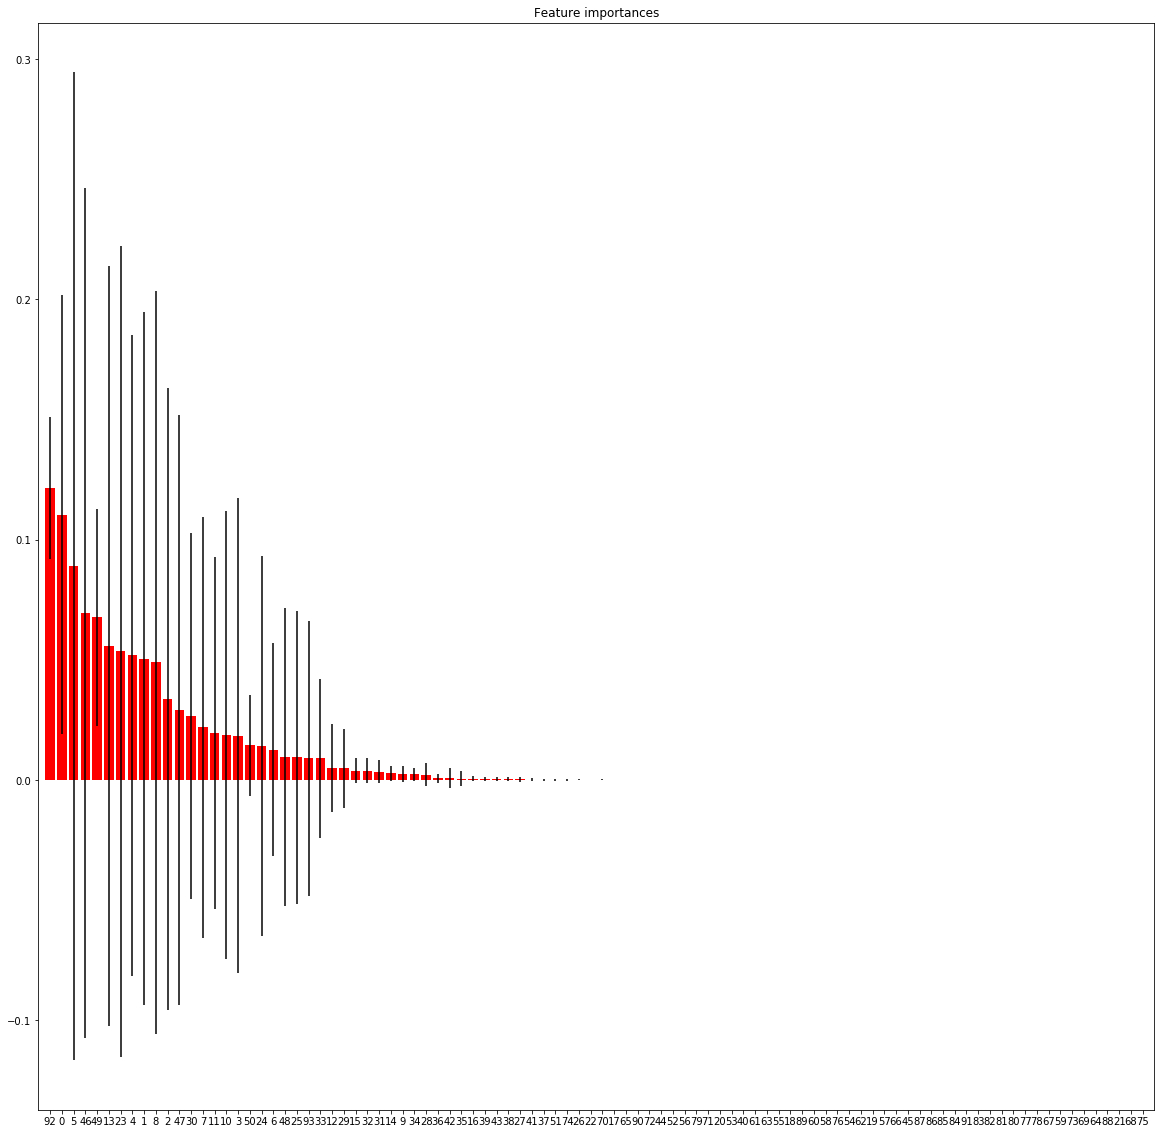

In [52]:
importances = ranFor.feature_importances_
std = np.std([tree.feature_importances_ for tree in ranFor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X2_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(X2_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X2_train.shape[1]), indices)
plt.xlim([-1, X2_train.shape[1]])
plt.show()


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#Create a Gaussian Classifier
ranFor=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
X3_train, X3_test, y3_train, y3_test = train_test_split(copy_df[['cert_info']], target_function_list, test_size=0.3, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
y3_score=ranFor.fit(X3_train,y3_train)
y3_pred=ranFor.predict(X3_test)

print("Accuracy:",metrics.accuracy_score(y3_test, y3_pred))

print (metrics.confusion_matrix(y3_test, y3_pred))
#print metrics.roc_auc_score(y_test, probs[:, 1])
print(metrics.classification_report(y3_test, y3_pred))

scores = cross_val_score(RandomForestClassifier(), copy_df, target_function_list, scoring='accuracy', cv=30)
print('cross val' + str(scores))
print(str(scores.mean()))

Accuracy: 0.8244336569579288
[[439 184]
 [ 33 580]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       623
           1       0.76      0.95      0.84       613

   micro avg       0.82      0.82      0.82      1236
   macro avg       0.84      0.83      0.82      1236
weighted avg       0.85      0.82      0.82      1236



/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-pa

cross val[0.97826087 0.94927536 0.96376812 0.96376812 0.95652174 0.76811594
 0.76811594 0.89855072 0.92753623 0.95652174 0.94927536 0.95652174
 0.94927536 0.94927536 0.86956522 0.80434783 0.91304348 0.92753623
 0.96350365 0.95620438 0.96350365 0.91176471 0.95588235 0.97794118
 0.94117647 0.95588235 0.96323529 0.94852941 0.94852941 0.97794118]
0.930445646469738


In [ ]:
copy4_df = copy_df[]